<a href="https://colab.research.google.com/github/PRATIK-PHALE/travelsite2/blob/main/Netflix_Movies_%26_TV_shows_Clustering_Unsupervised_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**-
**Netflix Movies & TV shows Clustering -Unsupervised Learning**



##### **Project Type**    - Unsupervised Learning

##### **Team Member 1 -**Devash Kumar
##### **Team Member 2 -**Pratik Phale(self)


# 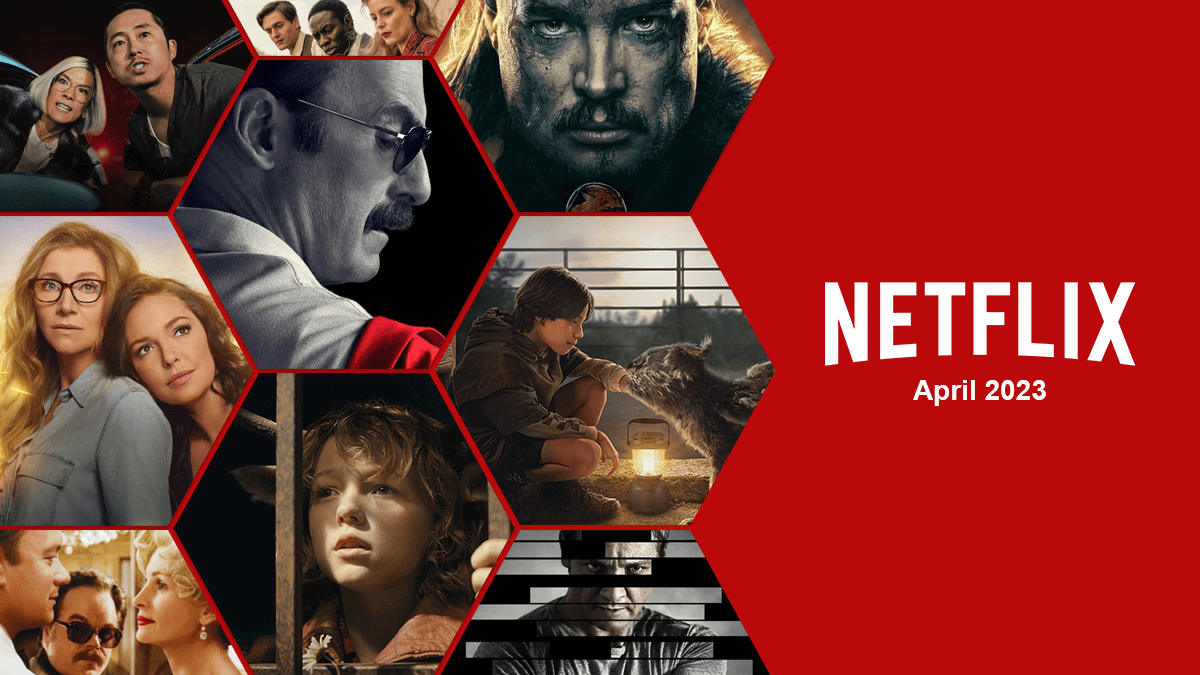

# **Project Summary -**



The objective of this project is to analyze and cluster a dataset related to Netflix. **The dataset consists of various attributes associated with Netflix shows and movies, such as title, genre, release year, duration, rating, and others. The aim is to explore patterns and similarities among the content available on the platform and group them into meaningful clusters**.

To begin with, the dataset will be preprocessed by handling missing values, removing irrelevant columns, and transforming categorical variables into numerical representations. Feature engineering techniques may also be applied to extract useful information from the existing attributes.

Next, exploratory data analysis (EDA) techniques will be utilized to gain insights into the dataset. **Visualizations and statistical summaries will be used to understand the distribution of variables, identify any trends, and explore relationships between different features**.

Once the dataset has been thoroughly analyzed, clustering algorithms such as k-means, hierarchical clustering, or density-based spatial clustering will be employed. These algorithms will group similar Netflix shows and movies together based on their attributes. **The optimal number of clusters will be determined using techniques like the elbow method or silhouette analysis.**

After the clustering process, the results will be evaluated and interpreted. **The clusters will be analyzed to understand the common characteristics and patterns within each group. This analysis will provide valuable information for Netflix in terms of content categorization, recommendation systems, and content acquisition strategies**.

Finally, the findings and insights from the clustering analysis will be summarized and presented in a clear and concise manner. Visualizations, charts, and graphs will be used to effectively communicate the outcomes of the project. **Recommendations may also be provided based on the identified clusters, suggesting potential improvements or strategies for Netflix** to enhance user experience and content offerings.

**In conclusion, this project aims to analyze a Netflix dataset, perform clustering techniques to group similar shows and movies together, and provide insights and recommendations based on the clustering results. The project will contribute to a better understanding of Netflix's content landscape and aid in decision-making processes for the company**.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-1392662c5a3a>:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00


**Netflix Movies/Tv shows Dataset : -**

https://drive.google.com/file/d/1gZnhI-Ft4qV0lWAKEmtcdh8VkBCQr5AA/view?usp=sharing

In [ ]:
#Loading the dataset
netflix_movies1= pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
netflix_movies1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_movies1.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
netflix_movies1['title'].value_counts()

title
3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: count, Length: 7787, dtype: int64

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
netflix_movies1.index

RangeIndex(start=0, stop=7787, step=1)

In [ ]:
netflix_movies1.shape

(7787, 12)

In [ ]:
netflix_movies1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Information

In [ ]:
# Dataset Info
netflix_movies1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
netflix_movies1.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
netflix_movies1.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#total null values in the netflix Dataset
netflix_movies1.isnull().sum().sum()

3631

In [ ]:
# Visualizing the missing values
#Handling Null Values
netflix_movies1['cast'].fillna(value='No cast',inplace=True)
netflix_movies1['country'].fillna(value=netflix_movies1['country'].mode()[0],inplace=True)

In [ ]:
netflix_movies1.shape

(7787, 12)

### **What did you know about your dataset?**





**Answer Here**

This dataset  contain information about various TV shows and movies available on Netflix, including details like the production country, release year, rating, duration, genre, and a description of each title. It consists of 12 columns and 7787 rows.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
netflix_movies1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
netflix_movies1.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7787,7787,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6832,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",No cast,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,718,3062,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### **Variables Description**

**Attribute Information**

**show_id :** Unique ID for every Movie / Tv Show

**type :** Identifier - A Movie or TV Show

**title :** Title of the Movie / Tv Show

**director :** Director of the Movie

**cast :** Actors involved in the movie / show

**country :** Country where the movie / show was produced

**date_added :** Date it was added on Netflix

**release_year :** Actual Releaseyear of the movie / show

**rating :** TV Rating of the movie / show

**duration :** Total Duration - in minutes or number of seasons

**listed_in :** Genere

**description:** The Summary description



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(netflix_movies1.apply(lambda col: col.unique()))

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object


In [ ]:
netflix_movies1.iloc[218]

show_id                                                      s219
type                                                      TV Show
title                                             A Queen Is Born
director                                             Carla Barros
cast                                Gloria Groove, Alexia Twister
country                                                    Brazil
date_added                                      November 11, 2020
release_year                                                 2020
rating                                                      TV-14
duration                                                 1 Season
listed_in                      International TV Shows, Reality TV
description     Gloria Groove and Alexia Twister make drag dre...
Name: 218, dtype: object

In [ ]:
# Write your code to make your dataset analysis ready.
# Create new features to store date, day, month and year seperately.
netflix_movies1["date_added"] = pd.to_datetime(netflix_movies1['date_added'], format='mixed')
  # First convert date_added to date time format.
netflix_movies1['day_added'] = netflix_movies1['date_added'].dt.day            # Compute day.
netflix_movies1['year_added'] = netflix_movies1['date_added'].dt.year          # Compute year.
netflix_movies1['month_added'] = netflix_movies1['date_added'].dt.month        # Compute month.

### **What all manipulations have you done and insights you found?**

**Answer Here.**

We can gather the following insights from the dataset:

**Director:** There are missing values in the "Director" column.

**Country:** There are missing values in the "Country" column, which have been filled with zero.

**Cast:** There are missing values in the "Cast" column, which have been filled with "No cast."

**Date Added:** There are missing values in the "Date Added" column.

 **Duplicated entries have been identified in the dataset,sum is zero.Unique Values also in  each column has to find unique items from different columns.**

**Date_addded Column:** In the "Date Added" column, additional information has been extracted such as the day, month, and year.

**In summary, the dataset contains missing values in the director, country, cast, and date added columns. The missing values in the cast column have been filled with "No cast," and the missing values in the country column have been filled with zero. Duplicated entries have been identified, and the sum of values in one column is zero.** Each column has different unique values. Additionally, the date added column has been parsed to extract the day, month, and year.








## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

labels = ['TV Show', 'Movie']
values = [netflix_movies1.type.value_counts()[1], netflix_movies1.type.value_counts()[0]]

# Colors
colors = ['#ffd700', '#008000']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout
fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

# Set colors
fig.update_traces(marker=dict(colors=colors))







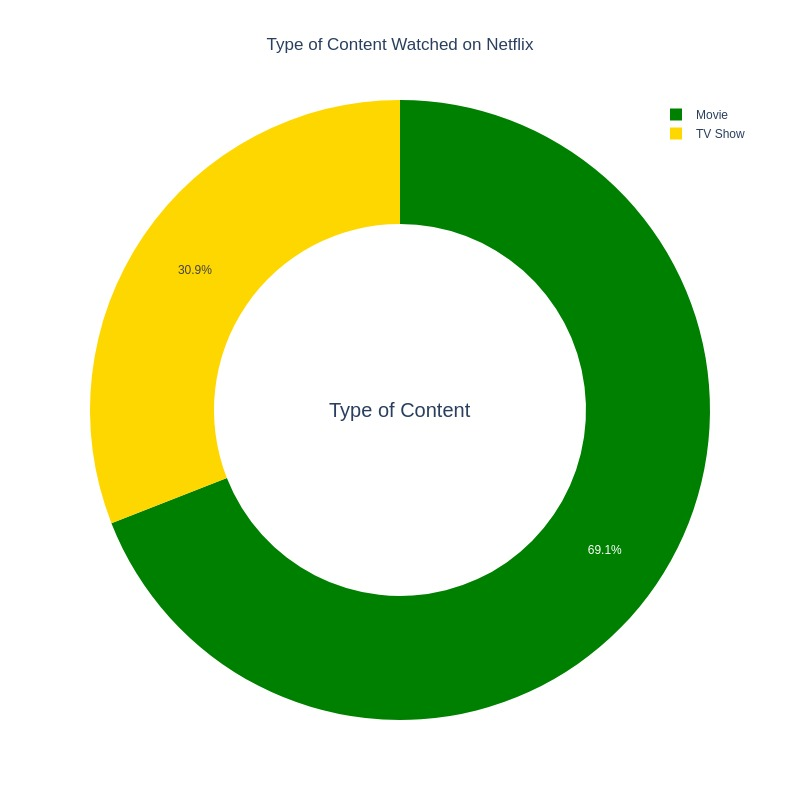

In [ ]:
from IPython.display import Image
img_bytes = fig.to_image(format="jpeg", width=800, height=800, scale=1)
Image(img_bytes)

##### **1. Why did you pick the specific chart?**








Answer Here.

The specific chart used in the code is a pie chart. I picked this chart because it is effective in visualizing the distribution of categorical data. In this case, the chart is used to represent the types of content watched on Netflix, which are categorized as "TV Show" and "Movie."

#####**2. What is/are the insight(s) found from the chart?**





**Answer Here**

TV shows constitute the majority, accounting for 69.1% of the content watched on Netflix, while movies make up a smaller percentage of 30.9%.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Answer Here

The data indicates a clear preference for TV shows over movies, with a significantly higher percentage of 69.1% compared to the lower percentage of 30.9% for movies. This suggests that people tend to enjoy shorter formats like TV shows rather than investing their time in longer movies that may be less engaging.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
import plotly.graph_objects as go
import pandas as pd
tv_show = netflix_movies1[netflix_movies1["type"] == "TV Show"]
movie = netflix_movies1[netflix_movies1["type"] == "Movie"]

col = "year_added"

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

trace1 = go.Scatter(x=content_1.index, y=content_1.values, name="TV Shows", marker=dict(color='#008000', line=dict(width=4)))
trace2 = go.Scatter(x=content_2.index, y=content_2.values, name="Movies", marker=dict(color='#ffd700', line=dict(width=4)))

fig = go.Figure(data=[trace1, trace2], layout=go.Layout(title="Content added over the years",title_x=0.5, legend=dict(x=0.8, y=1.1, orientation="h")))
# Display chart
fig.show()

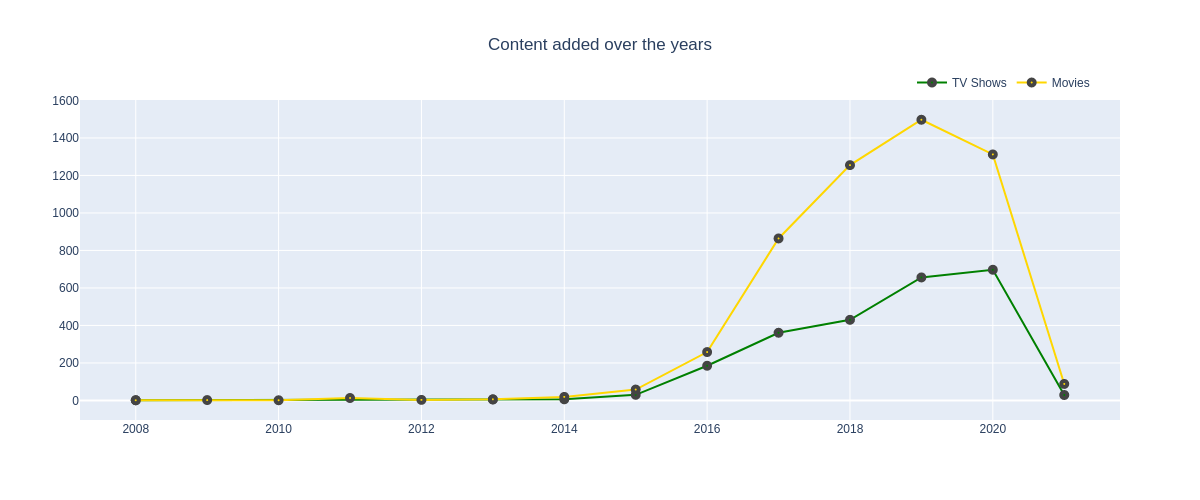

In [ ]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1200, height=500, scale=1)
Image(img_bytes)

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The line chart is suitable for showing the trend and distribution of data over a continuous axis (in this case, the years). It allows for easy comparison between the two categories (TV shows and movies) and how their counts vary over time.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The trend in the visualization indicates that between 2008 and 2022, there were relatively fewer TV shows and movies added to Netflix. However, starting from 2016, there was a slight increase in content additions. In 2019, there was a significant peak in the number of movies added, while TV shows experienced a similar trend but with a lesser increase compared to movies.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The gained insights indicate a positive impact for Netflix as the demand for both TV shows and movies on the platform has been increasing rapidly over the years. This growth presents an opportunity for Netflix to provide more high-quality content to its users, thereby enhancing user satisfaction and engagement.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

# Create a DataFrame to store month values and counts
months_df = pd.DataFrame(netflix_movies1['month_added'].value_counts())

# Reset the index to create a "month" column
months_df.reset_index(inplace=True)

# Rename the columns to "month" and "count"
months_df.rename(columns={'month_added': 'month'}, inplace=True)


In [ ]:
fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count', color_continuous_scale=['#0000FF', '#FFFF00'])
fig.update_layout(
    title={
        'text': 'Month wise Addition of Movies and TV Shows on Netflix',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1000,
        height=500,
        showlegend=True)
# fig.show()
fig.show()

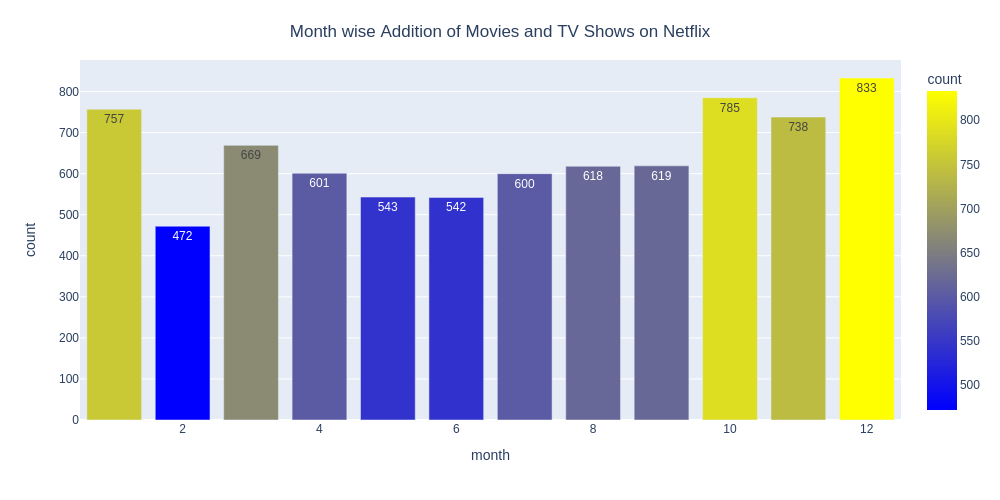

In [ ]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1000, height=500, scale=1)
Image(img_bytes)

#####**1. Why did you pick the specific chart?**

**Answer Here.**

The bar chart is suitable for comparing and displaying categorical data (months) and their corresponding counts.
The chart helps in understanding the distribution of content additions across different months and identifying any patterns or trends.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

During the months of October to December, there is a noticeable surge in the number of TV shows and movies being released on the Netflix platform.The months of October to December are known for having various holidays and celebrations, such as Halloween,
 Diwali, Thanksgiving, and Christmas, which often result in people spending more time at home and seeking entertainment options

#####**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The gained insights regarding the increase in TV shows and movies on the Netflix platform during the months of October to December can potentially create a positive business impact. Here are a few reasons:-

**1-Meeting Seasonal Demand**

**2-Retaining Existing Subscribers**

**3-Attracting New Subscribers**



#### Chart - 4

<Axes: xlabel='month_added', ylabel='count'>

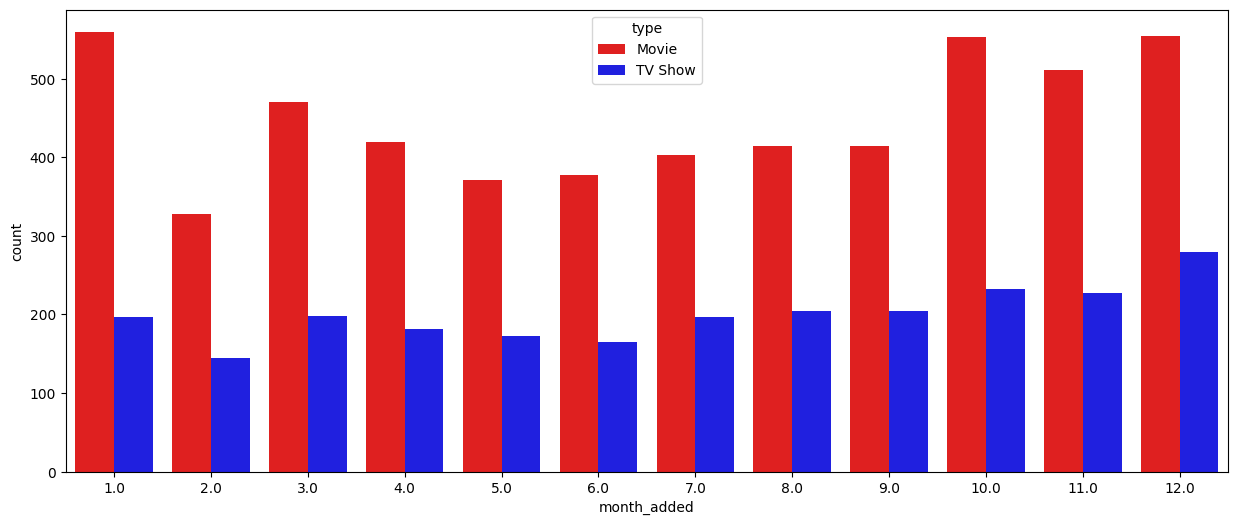

In [ ]:
# Chart - 4 visualization code
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='month_added', hue='type',lw=5, data=netflix_movies1, ax=ax,palette=['#FF0000' ,'#0000FF'])

##### **1. Why did you pick the specific chart?**

**Answer Here.**

By using a countplot, we can easily see and compare the frequencies of TV show and movie additions for each month.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

**Movies:**

January, October, and December appear to be the trending months for movie additions on Netflix compared to other months.

**Tv Shows:**

October, November, and December emerge as the trending months for TV show additions on Netflix compared to other months.



##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The gained insights regarding the trending months for movies and TV shows on Netflix can potentially create a positive business impact. Here's why:

**1-Meeting Viewer Demand:**

**2-Capitalizing on Seasonal Trends:**

**3-Improved Competitiveness:**

#### Chart - 5

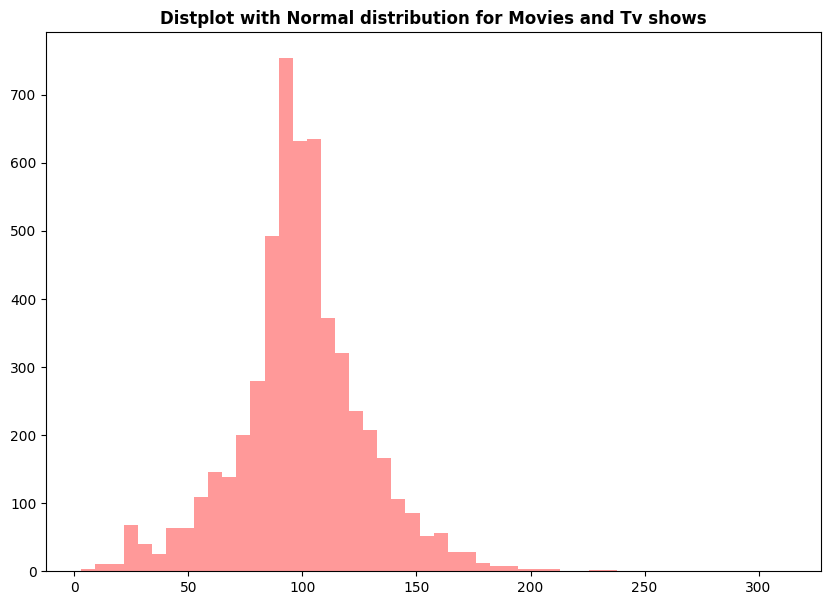

In [ ]:
# Chart - 5 visualization code
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movie['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies and Tv shows',fontweight="bold")
plt.show()

1.**Why did you pick the specific chart?**


**Answer Here**

The Distplot is a suitable choice for this analysis because it allows us to observe the frequency or count of movies falling into different duration ranges.

2.**What is/are the insight(s) found from the chart?**

**Answer Here**

The average length of movies and TV shows falling within the range of 50 to 150 minutes can vary depending on the specific content available on Netflix.

**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

**Positive Business Impact:**

1-**Audience Flexibility :** By offering movies and TV shows with a variety of lengths, ranging from shorter films to longer epic productions, Netflix can cater to the diverse preferences and schedules of its audience

2-**Increased Engagement :** Movies and TV shows with varying lengths provide options for viewers to choose content that fits their available time. This can lead to increased engagement and longer viewing sessions

3-**Content Diversity :** By including movies and TV shows of different lengths, Netflix can expand its content library and cater to various genres and storytelling formats.

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

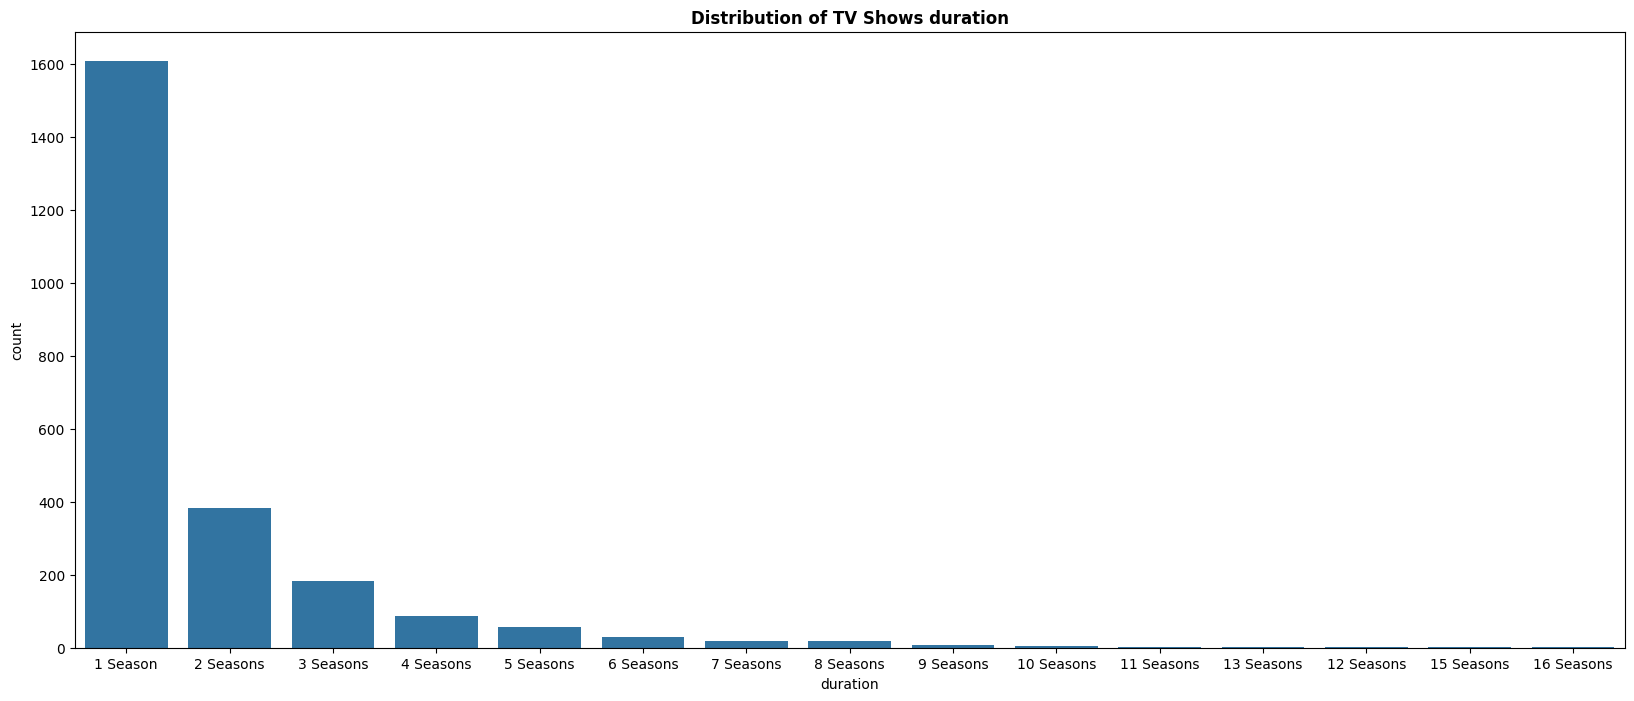

In [ ]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(20,8))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_show['duration'],data=tv_show,order = tv_show['duration'].value_counts().index)

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The chart in question is a countplot, which is a type of bar chart that shows the frequency or count of each category in a categorical variable. It seems to be used to display the distribution of TV show seasons

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

From the chart, we observed that the majority of TV shows or web series in the dataset have only one season, while the remaining shows have a maximum of two, three, four, or five seasons.

#####**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Yes ,**Positive Impact**  because by recognizing that the majority of TV shows have a limited number of seasons, content producers and streaming platforms can optimize their production planning. They can allocate resources more efficiently, reduce production costs, and potentially increase the output of content.


#### Chart - 6

([<matplotlib.patches.Wedge at 0x7955b9e30d60>,
 [Text(-0.8902585632950727, -0.6460957285726268, 'Others'),
  Text(0.9711911599582614, 0.7048317038974106, 'Originals')],
 [Text(-0.4855955799791305, -0.3524158519487055, '69.98%'),
  Text(0.5665281766423191, 0.4111518272734894, '30.02%')])

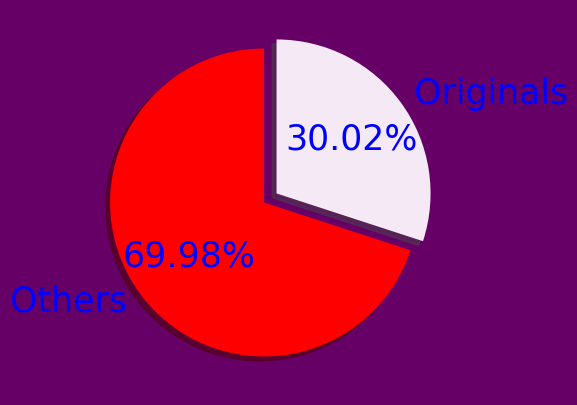

In [ ]:
# Chart - 6 visualization code
movie['originals'] = np.where(movie['release_year'] == movie['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#660066")
ax.patch.set_facecolor("#660066")
explode = (0, 0.1)
ax.pie(movie['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"blue", 'fontsize': 25}, colors =['red','#F5E9F5'])

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The pie plot is a suitable choice for visualizing the distribution of categorical data, such as the proportion of "originals" and "others" in this case. It allows you to see the relative sizes of each category as a portion of the whole.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

Out of the movies available on Netflix, 30% are Netflix originals, while the remaining 70% are movies that were released earlier through different distribution channels and subsequently added to the Netflix

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Yes, gaining insights can indeed help create a positive business impact. By understanding the distribution of movies on Netflix, such as the proportion of Netflix originals versus non-originals, the streaming service can make informed decisions about content acquisition and production.

#### Chart - 7

In [ ]:
netflix_movies1['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                              No cast
Name: cast, Length: 7787, dtype: object

In [ ]:
# seperating actors from cast column
cast = netflix_movies1['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()


No cast             718
Anupam Kher          42
Shah Rukh Khan       35
Om Puri              30
Naseeruddin Shah     30
                   ... 
Archie Alemania       1
Demore Barnes         1
Marty Adams           1
Nicole Boivin         1
Rachel Khoo           1
Name: count, Length: 32882, dtype: int64

In [ ]:
cast =cast[cast != 'No cast']


In [ ]:
cast.value_counts()

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Name: count, Length: 32881, dtype: int64

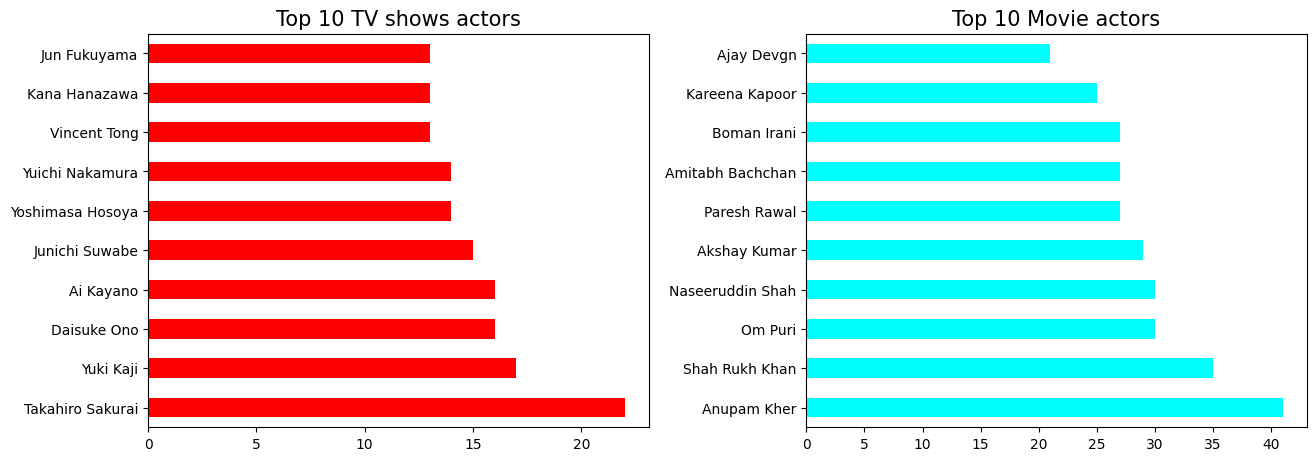

In [ ]:
# Chart - 7 visualization code
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = netflix_movies1[netflix_movies1['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor =top_TVshows_actor[top_TVshows_actor != 'No cast']
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0],color='red')
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = netflix_movies1[netflix_movies1['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
top_movie_actor =top_movie_actor[top_movie_actor != 'No cast']
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1],color='Cyan')
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()


##### **1. Why did you pick the specific chart?**

**Answer Here.**

The horizontal orientation of the bars allows for easier reading and comparison of the values. The length of each bar represents the number of TV shows or movies an actor has appeared in. The chart also includes titles and is divided into two subplots, making it clear that one subplot represents TV shows and the other represents movies.


##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

In the TV shows category, the actor with the highest appearance is Takahiro Sakurai. In the movies category, the actor with the highest appearance is Anupam Kher.

**Chart - 8**

In [ ]:
# Chart - 8 visualization code
top_10_Genre = netflix_movies1['listed_in'].value_counts().head(10)

fig2 = px.pie(top_10_Genre, values=top_10_Genre.values, names=top_10_Genre.index)

custom_colors = ['#4c78a8', '#72b7b2', '#ff7f0e', '#2ca02c', '#d62728']
fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0,
                   marker=dict(colors=custom_colors))

fig2.update_layout(height=600, width=900, title='Top 10 genres on Netflix',
                   margin=dict(t=100, b=30, l=0, r=0),
                   showlegend=False,
                   plot_bgcolor='#fafafa',
                   paper_bgcolor='#fafafa',
                   title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                   font=dict(size=12, color='#FF0000'),
                   hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

fig2.show()

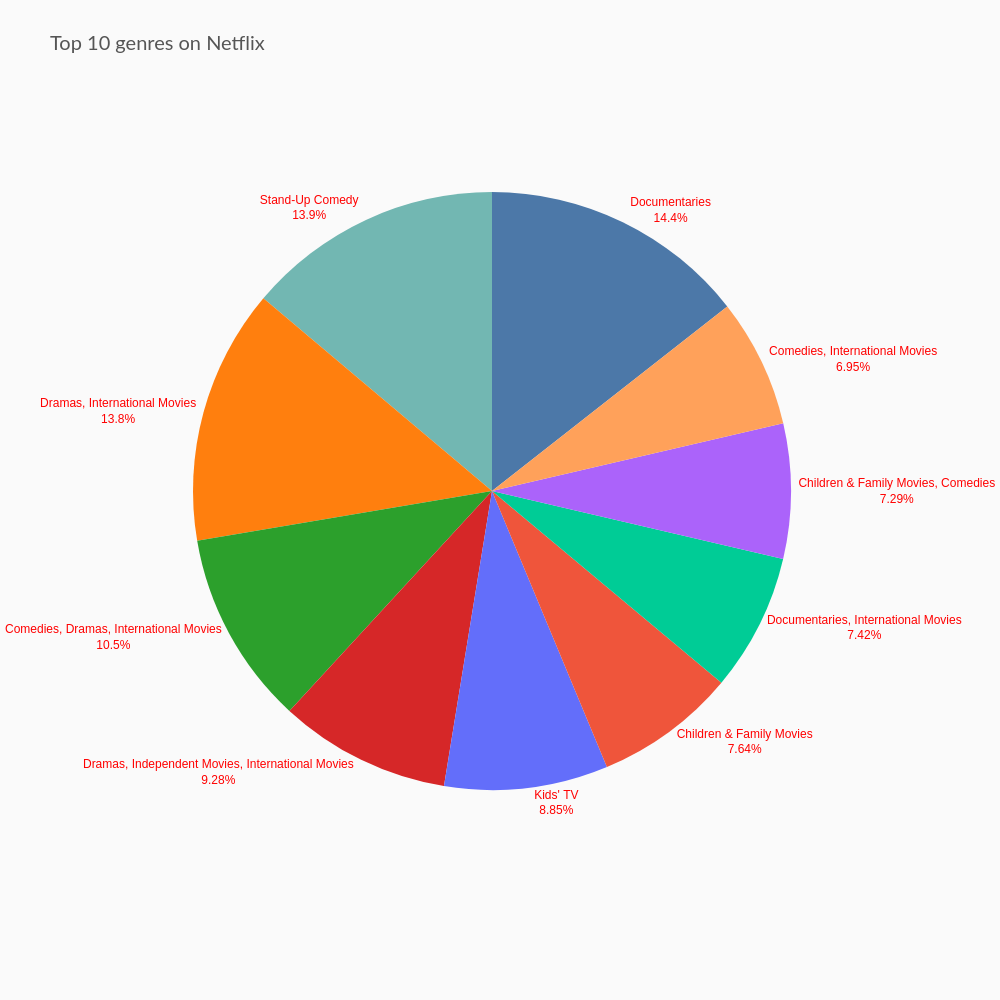

In [ ]:
from IPython.display import Image
img_bytes = fig2.to_image(format="png", width=1000, height=1000, scale=1)
Image(img_bytes)

1.**Why did you pick the specific chart?**

**Answer Here.**

The pie chart's circular shape allows viewers to quickly compare the sizes of different genres by observing the relative areas of the slices. The accompanying labels and percentage values outside the slices provide additional information and enhance the readability of the chart.

2.**What is/are the insight(s) found from the chart?**

**Answer Here.**

In this chart, the top three genres on Netflix based on their distribution are:

1-**Documentaries:** 14.4%

2-**Stand-up Comedy:** 13.9%

3-**Drama, International Movies:**1 3.8%

These genres have the highest percentages compared to the other genres included in the top 10 list.

3.**Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here.**

The gained insights from analyzing the distribution of genres on Netflix can potentially help create a positive business impact in several ways

1-**Content Curation :** By focusing on genres that have high viewer demand, Netflix can ensure that it offers a diverse and appealing selection of movies and shows to its subscribers

2-**Targeted Acquisitions and Productions :** It can guide them in identifying genres that are in high demand and have a proven audience. This can optimize their investments in content creation and acquisition

3-**Personalized Recommendations:** Personalized recommendations for individual users, improving their overall experience and encouraging them to spend more time on the platform.



#### Chart - 9 - Correlation Heatmap

In [ ]:
ratings = {
  'TV-PG': 'Older Kids',
  'TV-MA': 'Adults',
  'TV-Y7-FV': 'Older Kids',
  'TV-Y7': 'Older Kids',
  'TV-14': 'Teens',
  'R': 'Adults',
  'TV-Y': 'Kids',
  'NR': 'Adults',  # More descriptive replacement for 'Adults'
  'PG-13': 'Teens',
  'TV-G': 'Kids',
  'PG': 'Older Kids',
  'G': 'Kids',
  'UR': 'Adults',  # More descriptive replacement for 'Adults'
  'NC-17': 'Adults'
}

def replace_ratings(df, ratings_dict):
  """Replaces ratings in a pandas DataFrame with target ages.

  Args:
      df (pandas.DataFrame): The DataFrame containing the 'rating' column.
      ratings_dict (dict): A dictionary mapping rating codes to target ages.

  Returns:
      pandas.DataFrame: The DataFrame with the 'target_ages' column added.
  """

  df['target_ages'] = df['rating'].map(ratings_dict)
  # Handle missing ratings (if any)
  df['target_ages'].fillna('Unknown', inplace=True)
  return df

# Assuming netflix_movies1 is a pandas DataFrame
netflix_movies1 = replace_ratings(netflix_movies1.copy(), ratings)


In [ ]:
# Correlation Heatmap visualization code
#Assigning the Ratings into grouped categories
#ratings = {
    #'TV-PG': 'Older Kids',
    #'TV-MA': 'Adults',
    #'TV-Y7-FV': 'Older Kids',
    #'TV-Y7': 'Older Kids',
    #'TV-14': 'Teens',
    #'R': 'Adults',
    #'TV-Y': 'Kids',
    #'NR': 'Adults',
    #'PG-13': 'Teens',
    #'TV-G': 'Kids',
    #'PG': 'Older Kids',
   # 'G': 'Kids',
  #  'UR': 'Adults',
 #   'NC-17': 'Adults'
#}


# netflix_movies1['target_ages'] = netflix_movies1['rating'].replace(ratings)


In [ ]:
# Preparing data for
netflix_movies1['count'] = 1

data = netflix_movies1.groupby('country')[['count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = netflix_movies1.loc[netflix_movies1['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Adults,0.446328,0.277228,0.678261,0.255688,0.362832,0.77,0.469945,0.835821,0.513854,0.470934
Kids,0.180791,0.000000,0.095652,0.016251,0.008850,0.02,0.027322,0.022388,0.093199,0.089484
Older Kids,0.225989,0.039604,0.060870,0.160347,0.269912,0.07,0.120219,0.044776,0.204030,0.195297
Teens,0.146893,0.683168,0.165217,0.567714,0.353982,0.14,0.382514,0.097015,0.188917,0.242978
Unknown,0.000000,0.000000,0.000000,0.000000,0.004425,0.00,0.000000,0.000000,0.000000,0.001306


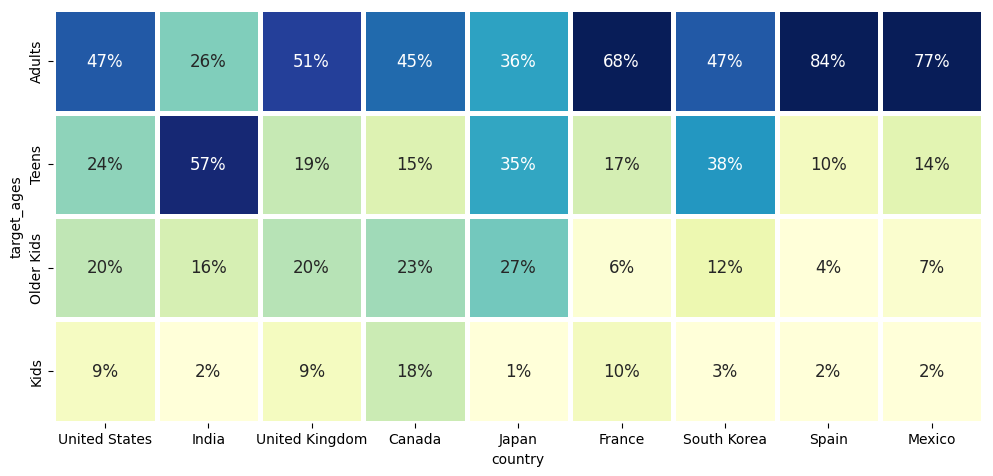

In [ ]:


fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()




**1. Why did you pick the specific chart?**

**Answer Here**

A heatmap is a suitable choice when visualizing the relationships between two categorical variables, in this case, countries and age groups. It allows for a clear representation of patterns, trends, and comparisons across different categories.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

In summary, the data provided suggests that the level of interest in the subject varies across different countries and target age groups. Here are the overall conclusions:

Among the countries listed, Spain stands out with the highest percentage of adults showing interest at 84%. This indicates a strong interest in the subject among adults in Spain.

1.**France**- Follows closely with 68% of adults expressing interest, demonstrating a significant level of engagement in the subject.

2.**India**- It has the highest percentage of interest among teenagers, with 57% showing interest. This suggests a notable interest among the younger population in India.

3.**United Kingdom** -It has a relatively high level of interest among adults, with 51% expressing interest.

4.**Mexico**-Here ,also demonstrates a substantial level of interest, with 77% of adults showing interest in the subject.

5.**South Korea** , **United States**- Both have 47% of adults showing interest, indicating a moderate level of engagement in these countries.

6.**Japan**- It shows a moderate level of interest among both adults and teens, with 36% of each group expressing interest.

7.**Canada**- It has the lowest percentage of interest among the listed countries, with 45% of adults showing interest.

**Overall, these conclusions highlight the varying levels of interest in the subject among different countries and target age groups. The data indicates that Spain, France, India, and Mexico have higher levels of interest in the adults, while Canada has relatively lower interest compared to the other countries**.

3.**Will the gained insights help creating a positive business impact?**

**Answer Here**

The gained insights can potentially help in creating a positive business impact, depending on the context and specific business goals.

1-Product Development

2-Market Expansion

3-Partnerships and Collaborations



#### Chart - 10 - Correlation Heatmap

In [ ]:
netflix_movies1['count'] = 1
data1 = netflix_movies1.groupby('listed_in')[['count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
data1 = data1['listed_in']

In [ ]:
data1

0                                       Documentaries
1                                     Stand-Up Comedy
2                        Dramas, International Movies
3              Comedies, Dramas, International Movies
4    Dramas, Independent Movies, International Movies
5                                            Kids' TV
6                            Children & Family Movies
7                 Documentaries, International Movies
8                  Children & Family Movies, Comedies
9                      Comedies, International Movies
Name: listed_in, dtype: object

In [ ]:
df_heatmap1 = netflix_movies1.loc[netflix_movies1['listed_in'].isin(data1)]
df_heatmap1 = pd.crosstab(df_heatmap1['listed_in'],df_heatmap1['target_ages'],normalize = "index").T
df_heatmap1

listed_in,Children & Family Movies,"Children & Family Movies, Comedies","Comedies, Dramas, International Movies","Comedies, International Movies",Documentaries,"Documentaries, International Movies","Dramas, Independent Movies, International Movies","Dramas, International Movies",Kids' TV,Stand-Up Comedy
target_ages,,,,,,,,,,
Adults,0.000000,0.000000,0.345679,0.484472,0.386228,0.377907,0.660465,0.468750,0.000000,0.894081
Kids,0.564972,0.177515,0.004115,0.012422,0.059880,0.063953,0.004651,0.006250,0.565854,0.000000
Older Kids,0.435028,0.816568,0.123457,0.099379,0.254491,0.238372,0.083721,0.109375,0.434146,0.018692
Teens,0.000000,0.005917,0.526749,0.403727,0.299401,0.319767,0.251163,0.415625,0.000000,0.087227


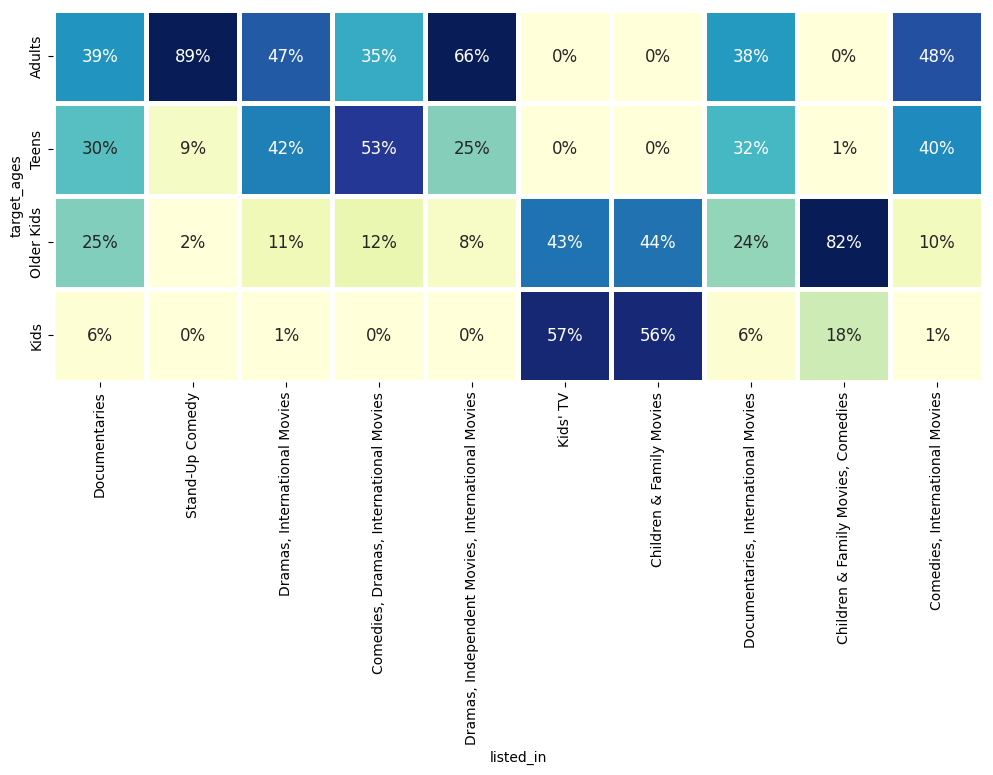

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

top=['Documentaries', 'Stand-Up Comedy', 'Dramas, International Movies',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies', "Kids' TV",
       'Children & Family Movies', 'Documentaries, International Movies',
       'Children & Family Movies, Comedies',
       'Comedies, International Movies']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap1.loc[age_order, top],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()


##### **1. Why did you pick the specific chart?**



**Answer Here.**

The heatmap is a suitable choice for this scenario because it allows me to represent the data using color encoding. The color intensity represents the frequency or proportion of movie genres within each age group.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The genre with the highest target audience of 89% adults is stand-up comedy.Children & Family Movies,Comedies also have a significant target audience with 82%. Primarily catering to older kids ,adults, Kids & TV shows have a target audience of around 66% to 53%.

In [ ]:
country_count=netflix_movies1['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries




,count
country,
United States,3062
India,923
United Kingdom,397
Japan,226
South Korea,183
Canada,177
Spain,134
France,115
Egypt,101


In [ ]:
data3 = dict(
    number=[3062, 923, 397, 226, 183, 177, 134, 115, 101, 100],
    country=["United States", "India", "United Kingdom", "Canada", "Spain", 'Turkey', 'Philippines', 'France',
             'South Korea', 'Australia']
)

fig = px.funnel(data3,
                x='number',
                y='country',
                title='Funnel Chart- Top 10 Countries by Number of Movies',
                labels={'number': 'Number of Movies', 'country': 'Country'},
                color_discrete_sequence=px.colors.qualitative.Plotly,
                height=1000,
                width=900,
                template='plotly_dark'
                )
fig.show()


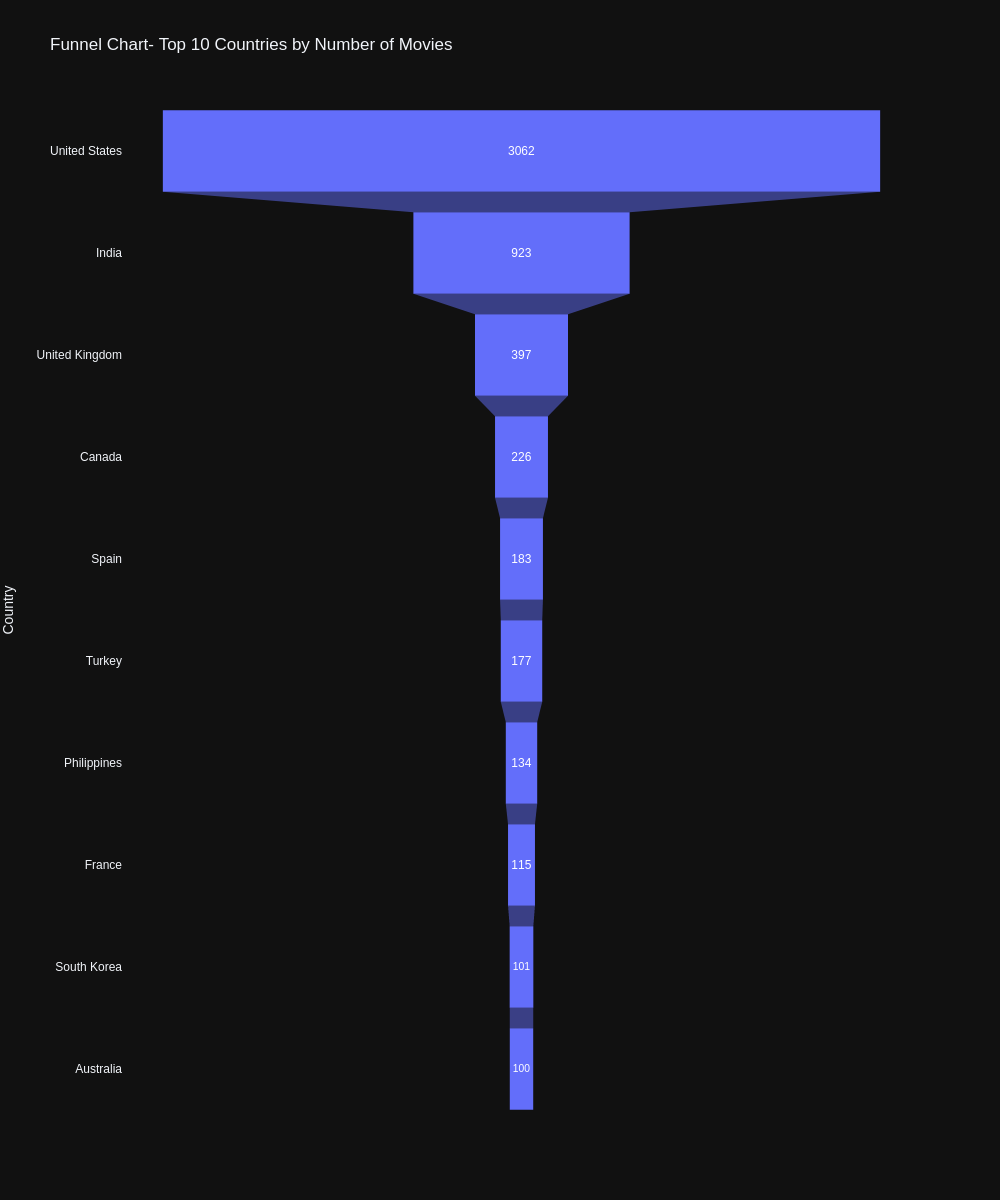

In [ ]:
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1000, height=1200, scale=1)
Image(img_bytes)

1.**Why did you pick the specific chart?**

**Answer Here.**

 Funnel charts are often used to represent a gradual reduction in data as it moves through different stages or categories. In this case, the chart visualizes the number of movies in the top 10 countries, showcasing the decreasing count from the top to the bottom.



2.**What is/are the insight(s) found from the chart?**

**Answer Here.**

The United States has the highest number of movies, with 3062 films, indicating a dominant presence in the film industry.India is the second-highest contributor with 923 movies, demonstrating a significant presence in the global Movies/Tv shows market.



3.**Will the gained insights help creating a positive business impact?**


**Answer Here.**

Yes, the gained insights can help create a positive business impact in several ways:

1-**Talent Acquisition :** This insight can be valuable for businesses looking to recruit skilled individuals in areas such as filmmaking, writing, acting, or technical roles.

2**-Market Expansion:**The insights reveal countries with a significant number of movies, such as the United States and India. This information can guide businesses in expanding their operations and targeting these markets for distribution, marketing, and partnerships.

# 4. **Hypothesis Testing**





In [ ]:
#making copy of df_clean_frame
netflix_hypothesis=netflix_movies1.copy()
#head of df_hypothesis
netflix_hypothesis.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,target_ages,count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0,Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0,Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,2017.0,11.0,Teens,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,1.0,Teens,1


In [ ]:
#filtering movie from Type_of_show column
netflix_hypothesis = netflix_hypothesis[netflix_hypothesis["type"] == "Movie"]

In [ ]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_hypothesis['target_ages'] = netflix_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
netflix_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

In [ ]:
netflix_hypothesis['target_ages'] = pd.Categorical(netflix_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

netflix_hypothesis['duration'] = netflix_hypothesis['duration'].astype(str)  # Convert to string type
netflix_hypothesis['duration'] = netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

netflix_hypothesis.head(3)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,target_ages,count
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0,Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,2017.0,11.0,Teens,1


In [ ]:
#group_by duration and target_ages
group_by_= netflix_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


In [ ]:
#mean and std. calutation for kids and older kids variables
#In A and B variable grouping values
A= group_by_.get_group('Kids')['duration']
B= group_by_.get_group('Older Kids')['duration']

M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids 66.48689138576779 
 Mean for  movies rated for older kids 92.02464788732394
Std for  movies rated for Older Kids 31.182576758429978 
 Std for  movies rated for kids 31.739464779840176


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('t-value',t_val)

267 852
dof 1117
SP_2 = 999.0491470682085
SP 31.6077387212089
t-value -11.51992627853396


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)


-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

**Based on your chart experiments, define two hypothetical statements from the dataset. In the next two questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.**

**Hypothetical Statement - 1**

**1.State Your research hypothesis as a null hypothesis and alternate hypothesis.**

**Answer Here.**

HO:Movies rated for kids and older kids are at least two hours long.(Null Hypothesis)

H1:Movies rated for kids and older kids are not at least two hours long.(Alternate Hypothesis)

2.Perform an appropriate statistical test.





In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

**Answer Here.**

**t-value** is not in the range, the **null hypothesis is rejecte**d.

**As a result, movies rated for kids and older kids are not at least two hours long.**

**Hypothetical Statement - 2**

**1.State Your research hypothesis as a null hypothesis .**

**Answer Here.**

H1:The duration which is more than 90 mins are movies

HO:The duration which is more than 90 mins are NOT movies





In [ ]:
#making copy of df_clean_frame
netflix_hypothesis=netflix_movies1.copy()
#head of df_hypothesis
netflix_hypothesis.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,target_ages,count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0,Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0,Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,2017.0,11.0,Teens,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,1.0,Teens,1


In [ ]:
netflix_hypothesis['duration']= netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

In [ ]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
netflix_hypothesis.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,target_ages,count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0,Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0,Adults,1


In [ ]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])

In [ ]:
# Perform Statistical Test to obtain P-Value
#group_by duration and TYPE
group_by_= netflix_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group1=group_by_.mean().reset_index()
group1

,type,duration
0,Movie,99.307978
1,TV Show,1.775934


In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')['duration']
B= group_by_.get_group('TV Show')['duration']
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  99.30797842663195
Std  1.5963589940648542


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val)

5377 2410
dof 7785
SP_2 = 253.64841040159254
SP 15.926343284055902
tvalue 249.81856492927665


Which statistical test have you done to obtain P-Value?


t-distribution





In [ ]:
# Perform Statistical Test to obtain P-Value

In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602687544602204

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.96026875446022

**Answer Here.**

Because the t-value is not in the range, the null hypothesis is rejected.

**As a result, The duration which is more than 90 mins are movies**

# **5. Feature Engineering & Data Pre-processing**

In [ ]:
# Combining all the clustering attributes into a single column
netflix_movies1['clustering'] = (netflix_movies1['director'] + ' ' + netflix_movies1['cast'] +' ' +
                                 netflix_movies1['country'] +' ' + netflix_movies1['listed_in'] +
                                 ' ' + netflix_movies1['description'])


In [ ]:
netflix_movies1['clustering'][25]

'Lyric R. Cabral, David Felix Sutcliffe No cast United States Documentaries This real-life look at FBI counterterrorism operations features access to both sides of a sting: the government informant and the radicalized target.'

# **Textual Data Preprocessing**

In [ ]:
# Expand Contraction
# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits contain digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
nltk.download('all',quiet=True)
from PIL import Image

# def transform_text(text):
#     # Convert text to lowercase
#     text = text.lower()

#     # Remove URLs
#     text = re.sub(r'http\S+', '', text)

#     # Tokenize text into words
#     words = nltk.word_tokenize(text)

#     # Remove non-alphanumeric characters
#     words = [word for word in words if word.isalnum()]

#     # Remove stopwords and punctuation
#     stopwords_set = set(stopwords.words('english'))
#     punctuation_set = set(string.punctuation)
#     words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

#     # Lemmatize words
#     lemmatizer = WordNetLemmatizer()
#     lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

#     # Join words into a string and return
#     return ' '.join(lemmatized_words)

In [ ]:
def transform_text(text):
    # Check if the input is a string
    if not isinstance(text, str):
        return text

    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)

# Apply the transform_text function to the 'clustering' column and create a new column 'Clean_Text'
# netflix_movies1['Clean_Text'] = netflix_movies1['clustering'].apply(transform_text)

# Display the first few rows of the DataFrame to verify the new column
# print(netflix_movies1.head())
#

In [ ]:
netflix_movies1['Clean_Text'] = netflix_movies1['clustering'].apply(transform_text)

In [ ]:
netflix_movies1["Clean_Text"]

0                                                     NaN
1       jorge michel grau demián bichir héctor bonilla...
2       gilbert chan tedd chan stella chung henley hii...
3       shane acker elijah wood john reilly jennifer c...
4       robert luketic jim sturgess kevin spacey kate ...
                              ...                        
7782    josef fare imad creidi antoinette turk elia ge...
7783    mozez singh vicky kaushal dia raaghav chanana ...
7784                                                  NaN
7785                                                  NaN
7786    sam dunn cast united kingdom canada united sta...
Name: Clean_Text, Length: 7787, dtype: object

In [ ]:
netflix_movies1['Clean_Text'] = netflix_movies1['Clean_Text'].fillna('').astype(str)

# **Text Vectorization**

**TF-IDF combines two metrics: Term frequency (TF) and inverse document frequency (IDF).**

Term Frequency (TF): This metric measures the frequency of a term in a document. It assumes that the more often a term appears in a document, the more relevant it is to that document. It is calculated using the formula:

**TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)**

**Inverse Document Frequency (IDF): This metric measures the importance of a term across a collection of documents. It gives higher weight to terms that appear less frequently in the entire collection. It is calculated using the formula:**


**IDF(t) = log_e(Total number of documents / Number of documents containing term t)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
bag_of_words = netflix_movies1['Clean_Text'].tolist()

In [ ]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
print(X.shape)

(7787, 20000)


In [ ]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'şimşek', 'şinasi', 'şükran'],
      dtype=object)

Which text vectorization technique have you used and why?


Answer Here.

# **Dimesionality Reduction**

**Do you think that dimensionality reduction is needed? Explain Why**

**Answer Here.**

PCA to reduce the dimensionality of the dataset. PCA identifies the directions (principal components) along which the data varies the most. These components are ordered by the amount of variance they explain in the data.

In [ ]:
# DImensionality Reduction (If needed)
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X.toarray())

PCA()

**Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)**


**Answer Here**

PCA can extract the most relevant features from a dataset. It transforms the original features into a new set of uncorrelated variables called principal components. These components are linear combinations of the original features and capture the maximum amount of variation present in the data.

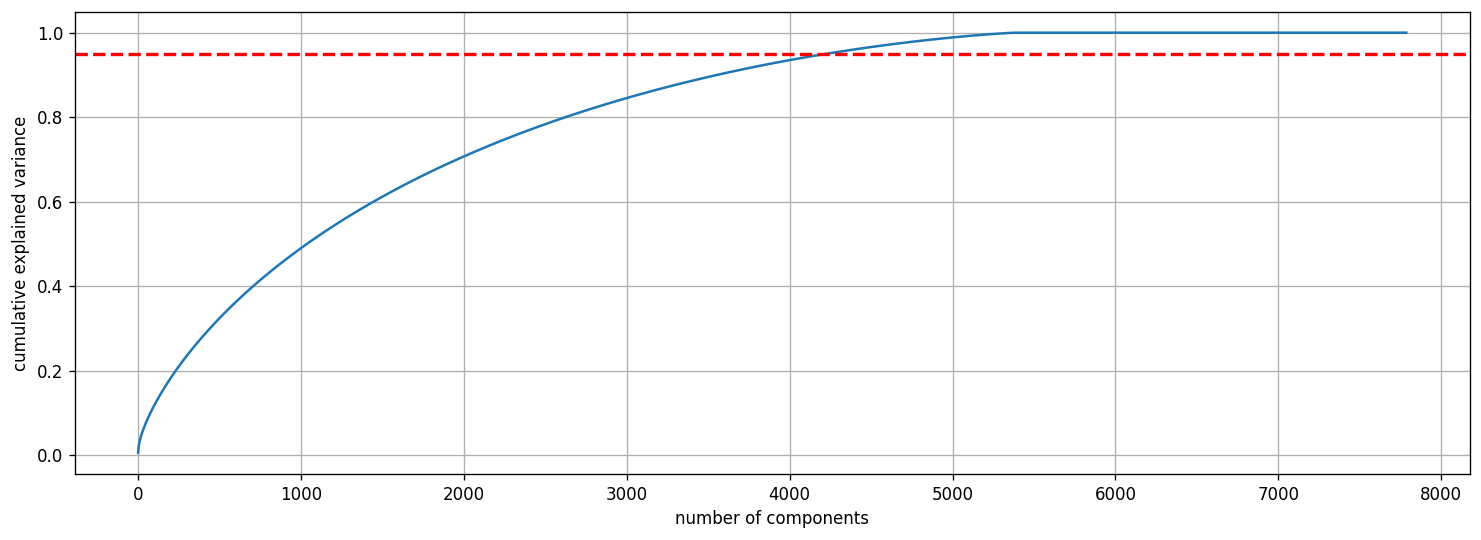

In [ ]:
# Lets plot explained var v/s comp to check how many components to be considered.
 #explained var v/s comp
# Add a grid to the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi=120)
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--',linewidth=2, label='95% Explained Variance')
plt.grid()
plt.show()

**The plot helps in determining the number of components to consider for dimensionality reduction. You can select the number of components where the cumulative explained variance reaches a satisfactory threshold, such as 95%. The point where the curve intersects or is closest to the threshold line can guide you in choosing the appropriate number of components for your analysis.**

In [ ]:
# Import the necessary libraries
from sklearn.decomposition import PCA
# Create an instance of PCA with the desired explained variance ratio
pca_tuned = PCA(n_components=0.95)
# Fit the PCA model on the input data, X, which is converted to a dense array
pca_tuned.fit(X.toarray())
# Transform the input data, X, to its reduced dimensional representation
X_transformed = pca_tuned.transform(X.toarray())
# Print the shape of the transformed data to see the number of samples and transformed features
print(X_transformed.shape)


(7787, 4226)


In [ ]:
X_transformed

array([[-1.65740427e-02, -6.40278678e-02,  3.58402088e-02, ...,
        -1.34666815e-05, -3.04911441e-05, -4.62303729e-05],
       [-3.01357610e-02,  9.92646649e-03,  2.06066640e-02, ...,
        -1.23295485e-03, -2.60571856e-03, -5.37407241e-04],
       [-2.71113465e-02,  1.06339311e-02, -2.60965538e-02, ...,
         4.47072127e-03,  2.72543571e-03,  5.07027297e-03],
       ...,
       [-1.65740427e-02, -6.40278678e-02,  3.58402088e-02, ...,
        -1.34666815e-05, -3.04911441e-05, -4.62303729e-05],
       [-1.65740427e-02, -6.40278678e-02,  3.58402088e-02, ...,
        -1.34666815e-05, -3.04911441e-05, -4.62303729e-05],
       [ 3.17269207e-01,  1.43858130e-01,  1.37812482e-01, ...,
         9.34085833e-03,  3.37228221e-03,  1.33258599e-02]])

# **6. ML Model Implementation**

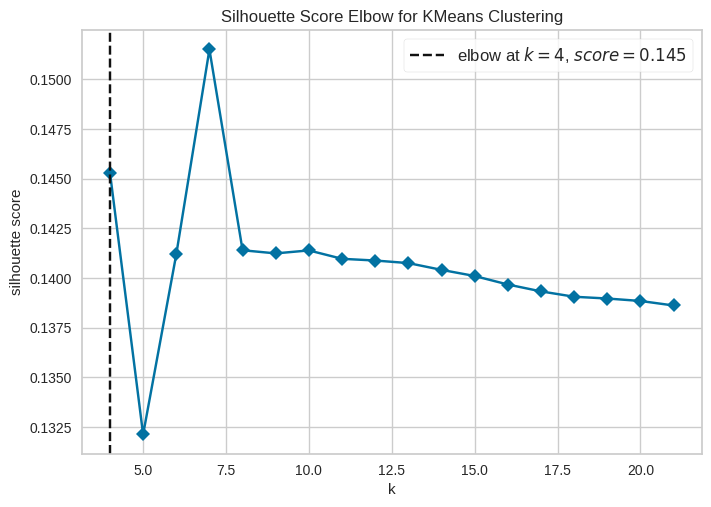

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model with a random_state of 5
model = KMeans(random_state=5)

# Initialize the KElbowVisualizer with the KMeans model and desired parameters
visualizer = KElbowVisualizer(model, k=(4, 22), metric='silhouette', timings=False, locate_elbow=True)

# Fit the visualizer on the transformed data
visualizer.fit(X_transformed)

# Display the elbow plot
visualizer.show()

**The plot will also indicate the "elbow" point, which represents the recommended number of clusters based on the selected metric.Using elbow plot with the optimal number of 5 clusters** .

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.14348186657698062


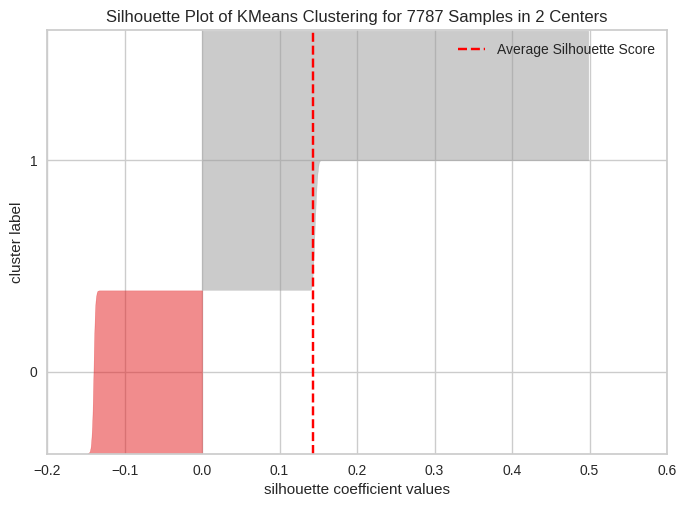

For n_clusters = 3, silhouette score is 0.15897016364996747


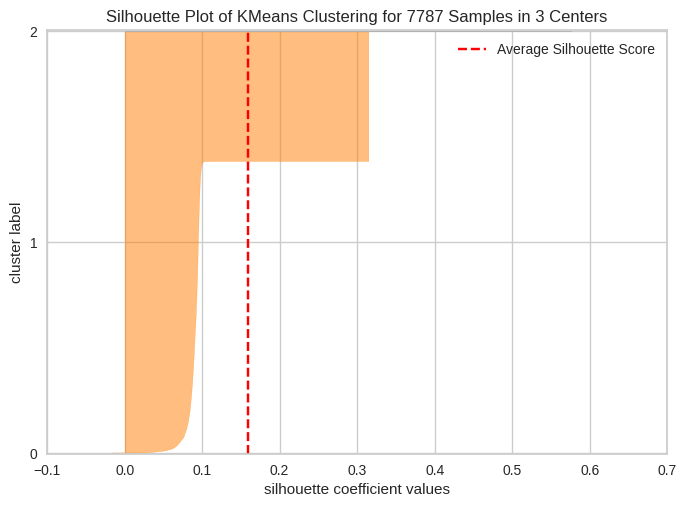

For n_clusters = 4, silhouette score is 0.14531415408458434


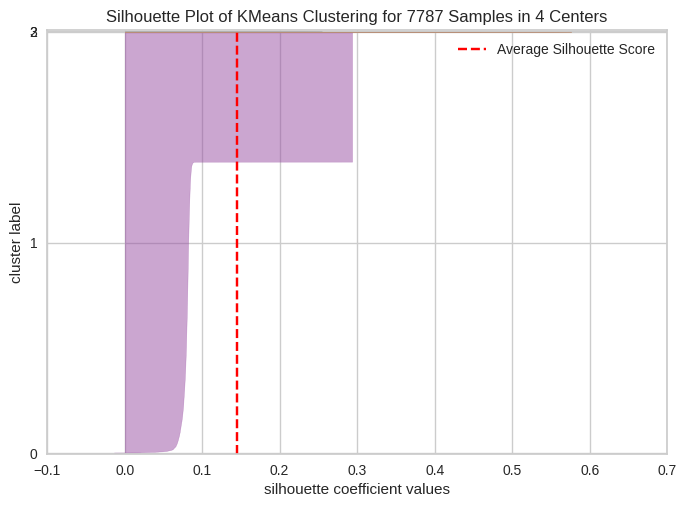

For n_clusters = 5, silhouette score is 0.13212927447125644


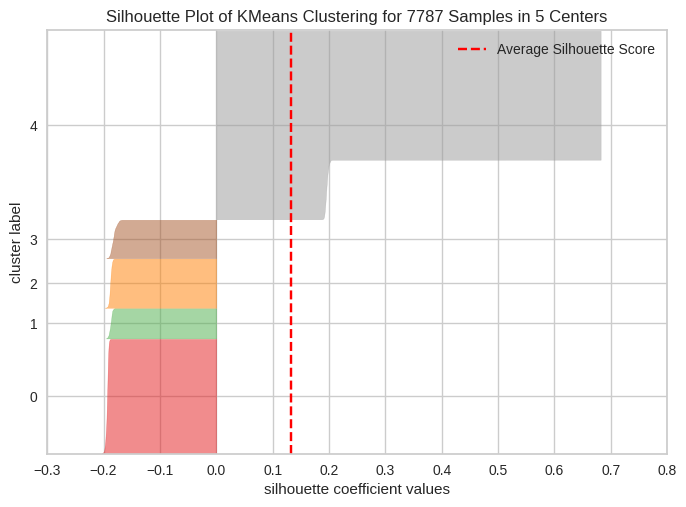

For n_clusters = 6, silhouette score is 0.14119574825402445


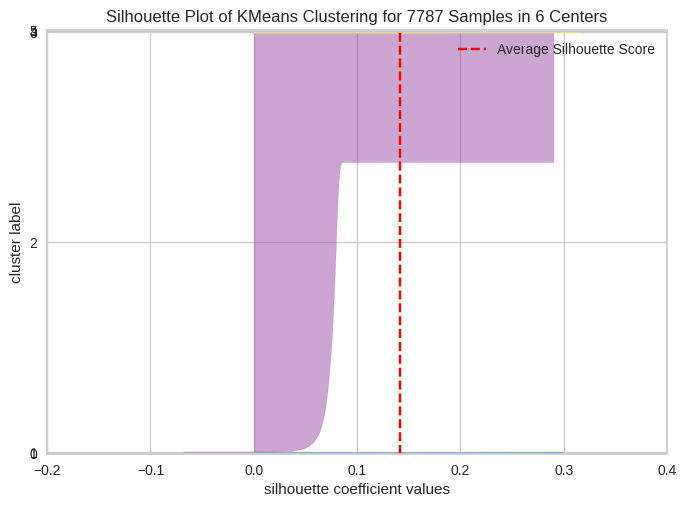

For n_clusters = 7, silhouette score is 0.15151101519759663


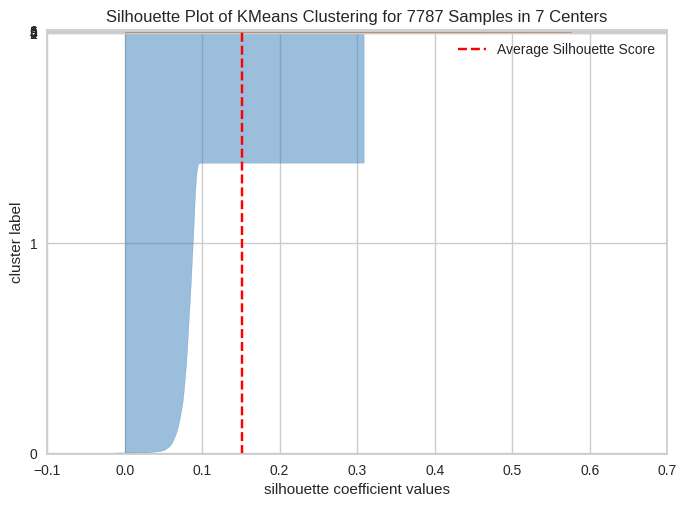

For n_clusters = 8, silhouette score is 0.14140315239899473


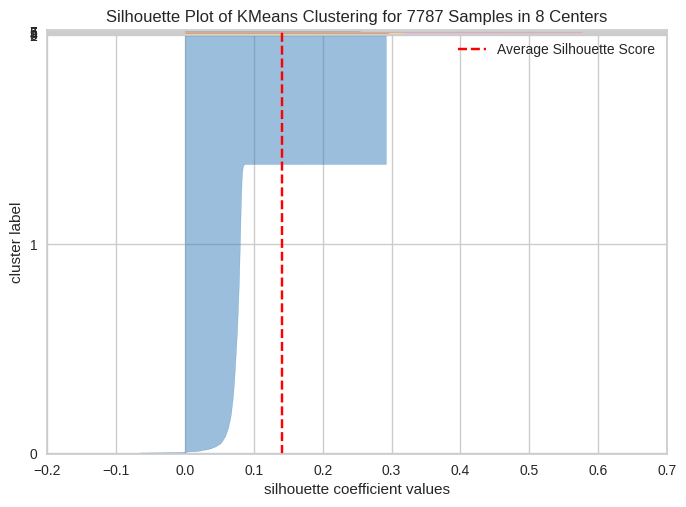

For n_clusters = 9, silhouette score is 0.14124493925001755


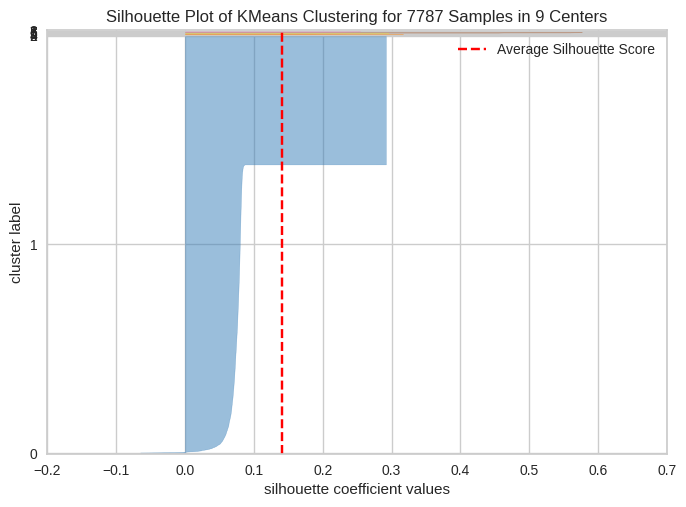

For n_clusters = 10, silhouette score is 0.14139502384781366


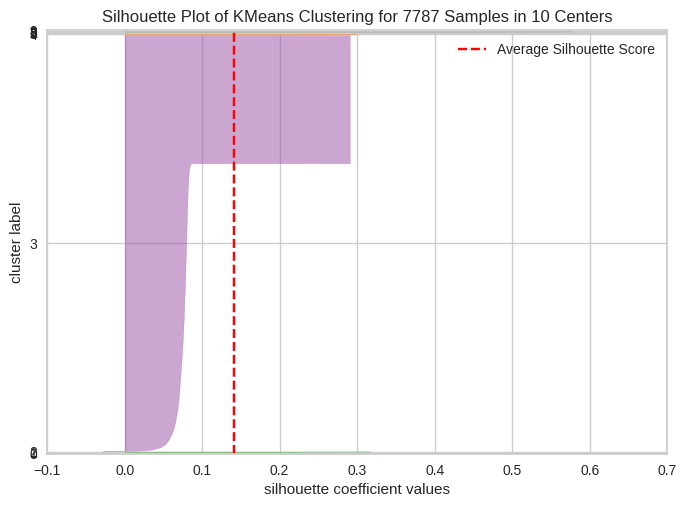

For n_clusters = 11, silhouette score is 0.1409726090903043


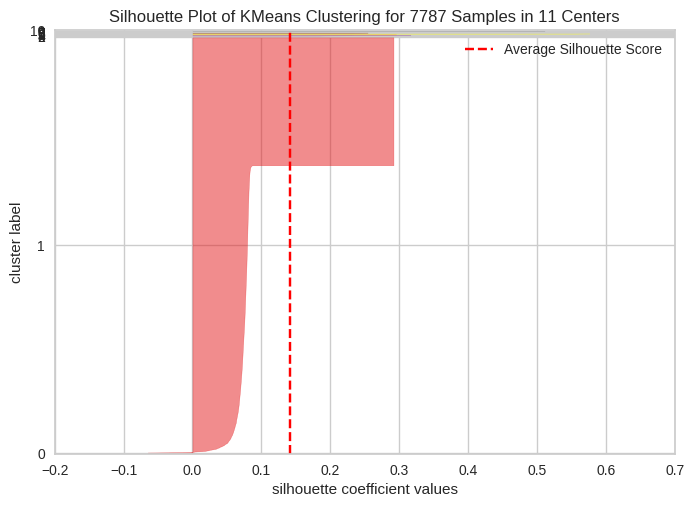

For n_clusters = 12, silhouette score is 0.14088601533149836


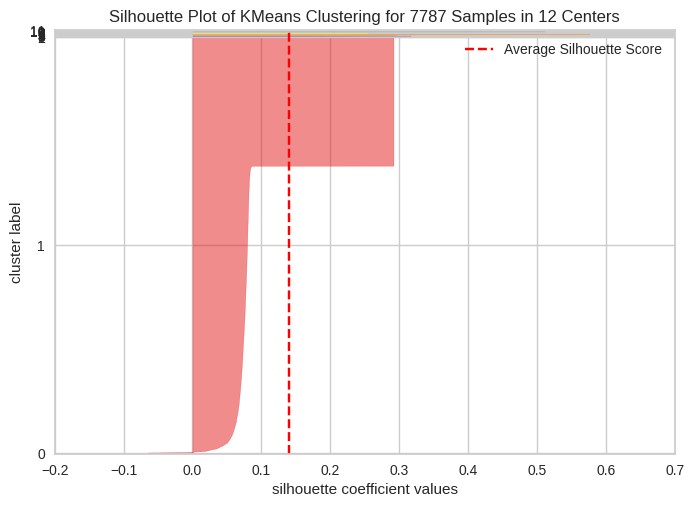

For n_clusters = 13, silhouette score is 0.14075723746683486


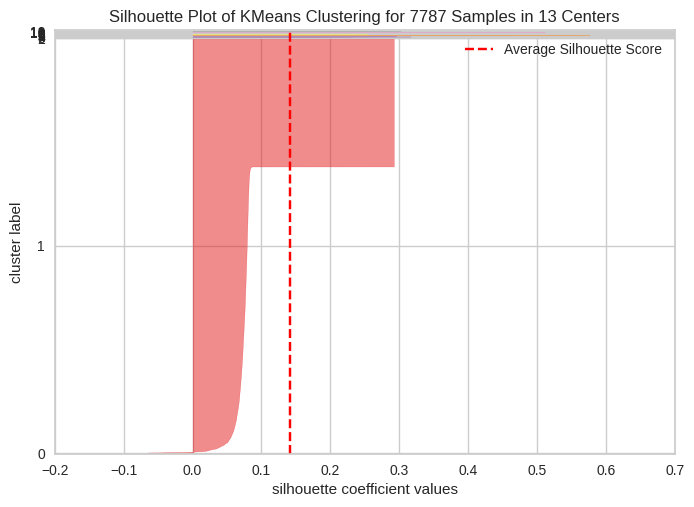

For n_clusters = 14, silhouette score is 0.14041604433162902


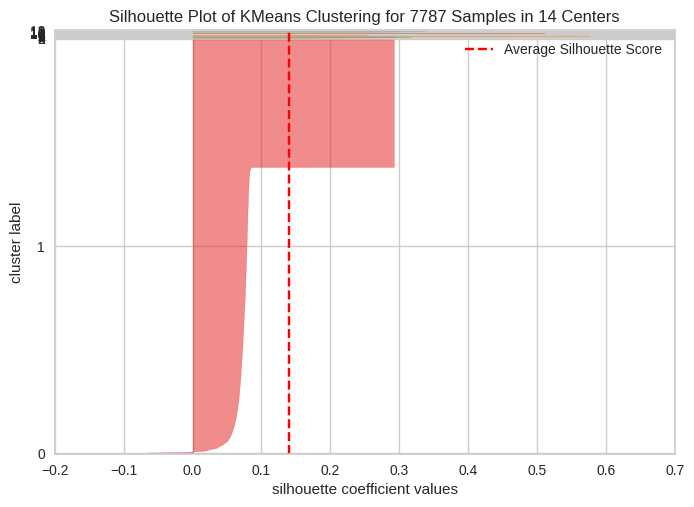

In [ ]:
silhouette_score_analysis(15)

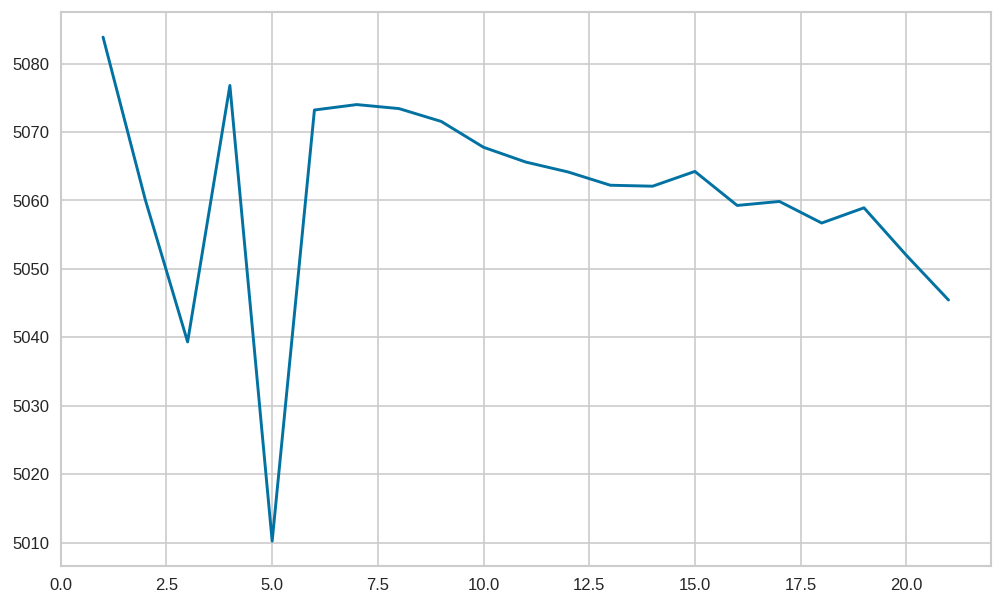

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a figure with a specific size and resolution
plt.figure(figsize=(10, 6), dpi=120)

# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Iterate over different numbers of clusters
for i in range(1, 22):
    # Create a KMeans model with default parameters
    model = KMeans(random_state=0)

    # Initialize the KMeans algorithm with specific parameters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    # Fit the KMeans algorithm to the transformed data
    kmeans.fit(X_transformed)

    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the number of clusters against the WCSS
plt.plot(range(1, 22), wcss)




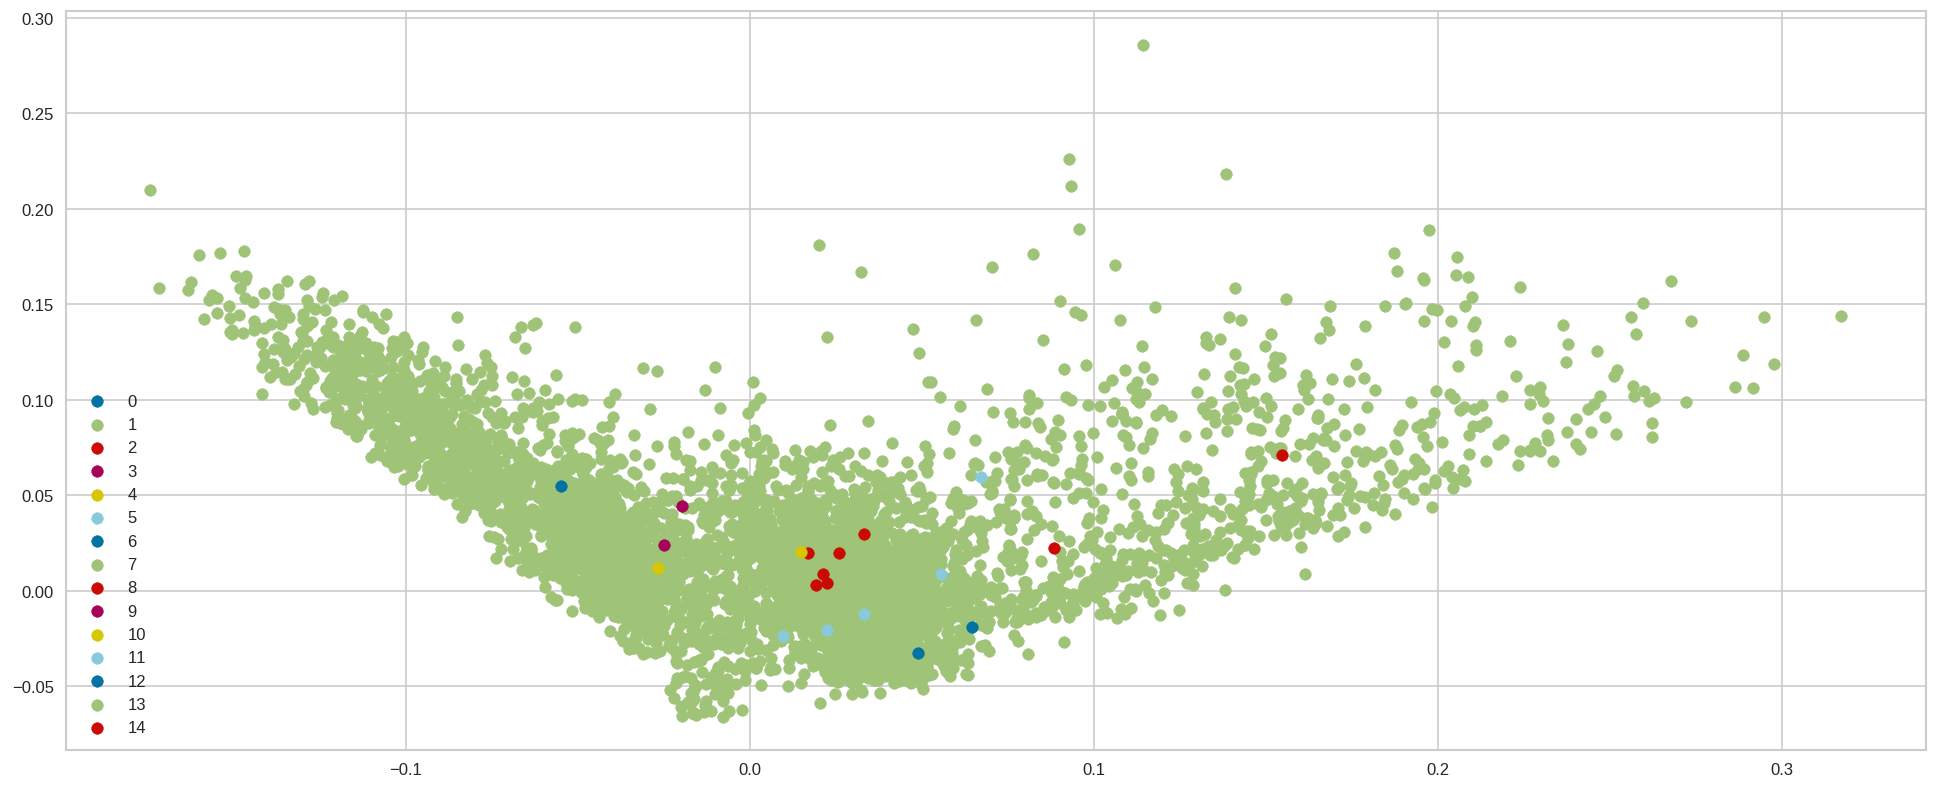

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Create a figure with a larger size and resolution
plt.figure(figsize=(20, 8), dpi=120)

# Initialize a KMeans model with 15 clusters
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=9)

# Fit the KMeans algorithm to the transformed data
kmeans.fit(X_transformed)

# Predict the labels of the clusters
label = kmeans.fit_predict(X_transformed)

# Get unique labels from the predictions
unique_labels = np.unique(label)

# Plot the results
for i in unique_labels:
    # Scatter plot the points belonging to each cluster
    plt.scatter(X_transformed[label == i, 0], X_transformed[label == i, 1], label=i)

# Display a legend to identify the clusters
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Add cluster values to the dateframe.
netflix_movies1['cluster_number'] = kmeans.labels_

In [ ]:
netflix_movies1.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,target_ages,count,clustering,Clean_Text,cluster_number
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0,Adults,1,NaN,,1


In [ ]:
# Count the number of movies or TV shows in each cluster
cluster_content_count = netflix_movies1['cluster_number'].value_counts().reset_index().rename(columns={'index': 'clusters', 'clusters': 'Movies/TV_Shows'})

# Print the cluster content count
print(cluster_content_count)


    cluster_number  count
0                1   7763
1                8      5
2                5      4
3               14      2
4               13      2
5               12      2
6                7      1
7                3      1
8                2      1
9                6      1
10               9      1
11               4      1
12               0      1
13              11      1
14              10      1


In [ ]:
#word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def word_count(category):
  print("Exploring Cluster", category)
  col_names = ['type','title','country','rating','listed_in','description']
  for i in col_names:
    df_word_cloud = netflix_movies1[['cluster_number',i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category]
    text = " ".join(word for word in df_word_cloud[i])
    # Create stopword list:
    stopwords = set(STOPWORDS)
  # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="#FFC0CB",width=500,height=500).generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    print("Looking for insights from", i ,"Movies/TV Shows")

    plt.show()





Exploring Cluster 9
Looking for insights from type Movies/TV Shows


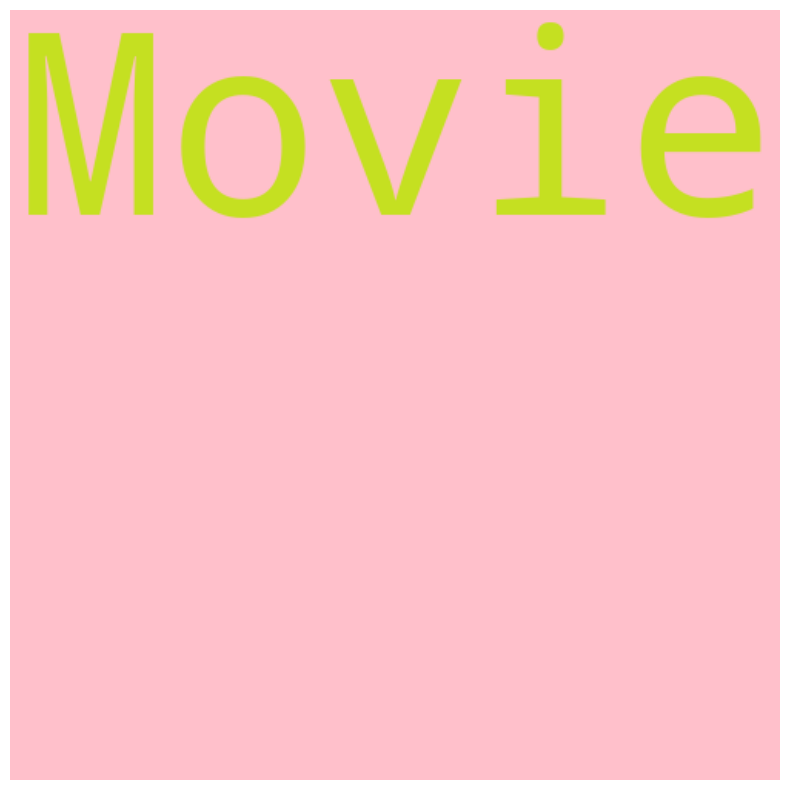

Looking for insights from title Movies/TV Shows


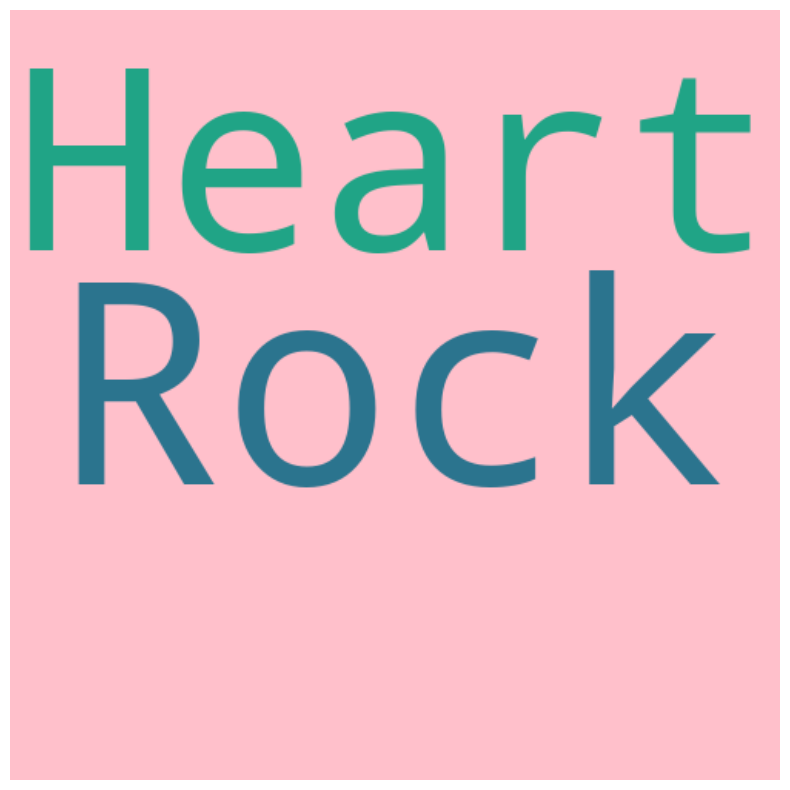

Looking for insights from country Movies/TV Shows


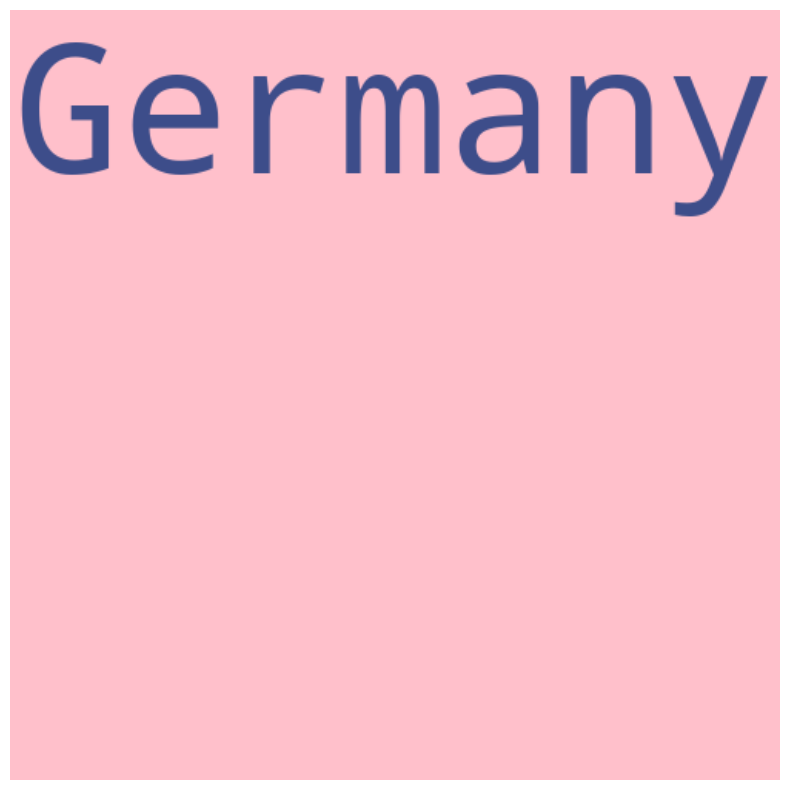

Looking for insights from rating Movies/TV Shows


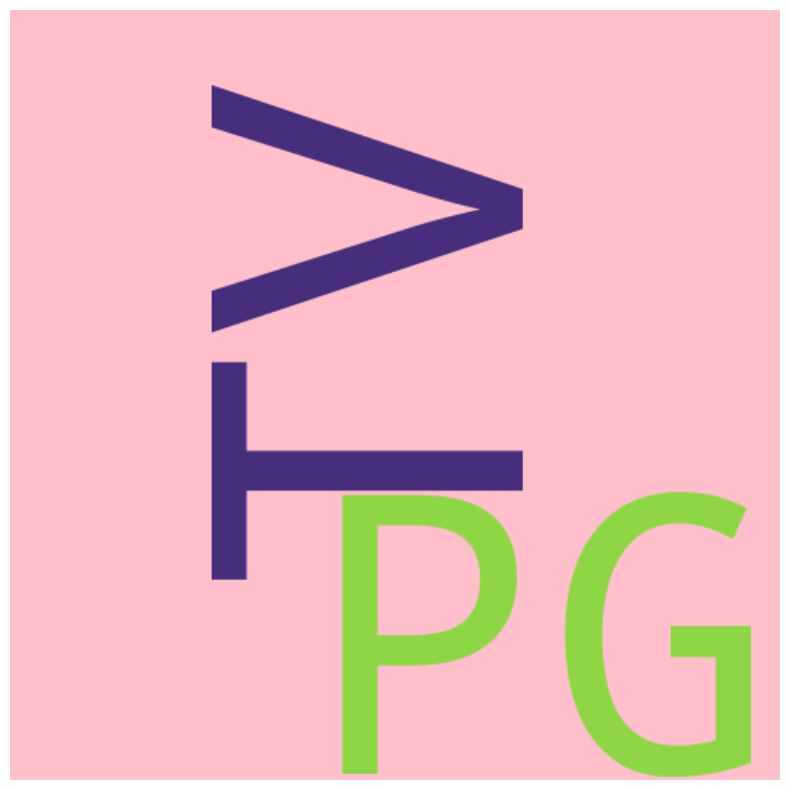

Looking for insights from listed_in Movies/TV Shows


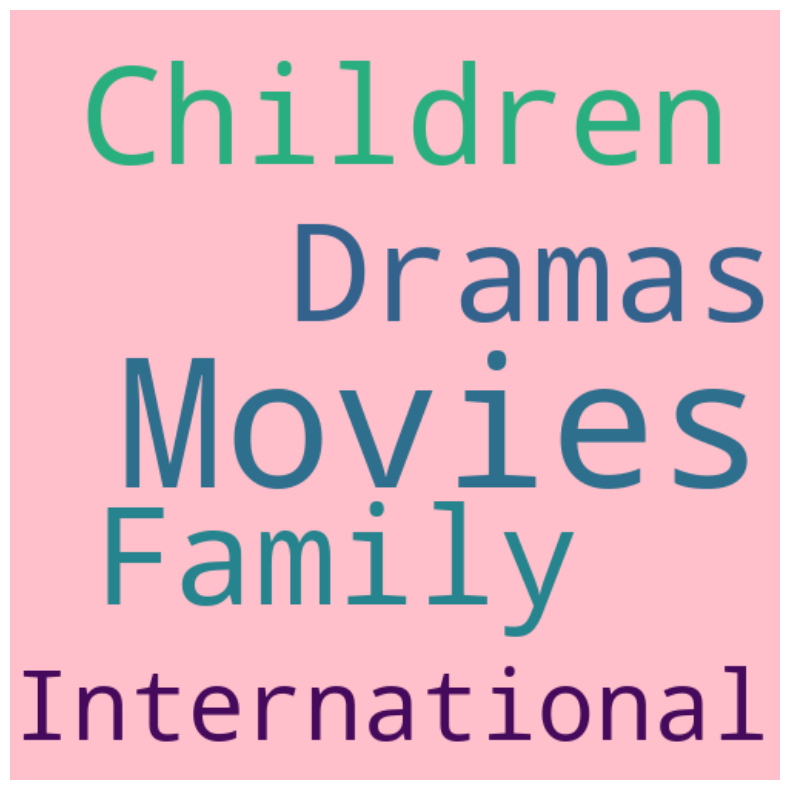

Looking for insights from description Movies/TV Shows


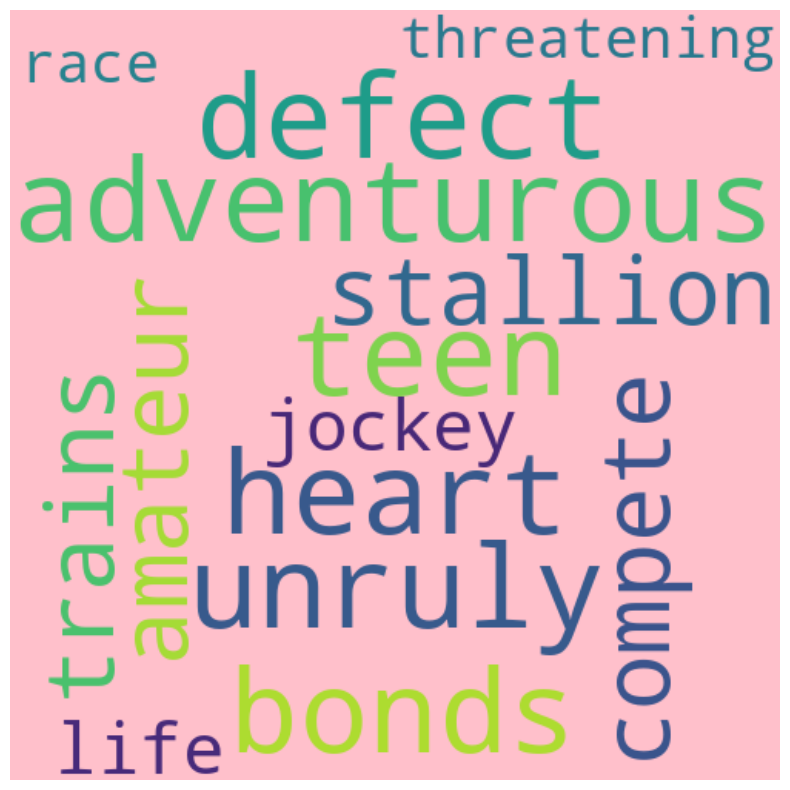

In [ ]:
word_count(9)

Cluster 9 in a dataset contains a total of 232 words. The most frequently occurring words in this cluster are as follows:

**Type** -  Movie & Tv shows

**Title** - Broadway,Remastered,Christmas ,Friends Orchestra

**Country**- United Kingdom,Argentina,United States,India

**Rating** -TV-MA,PG-TV

**Listed_in** -  Dramas International,Musical Dramas,Musicial
            Documentaries,Comedies International

**Description**- Documentary ,Music,One,Bad,Tour ,Love.

Exploring Cluster 11
Looking for insights from type Movies/TV Shows


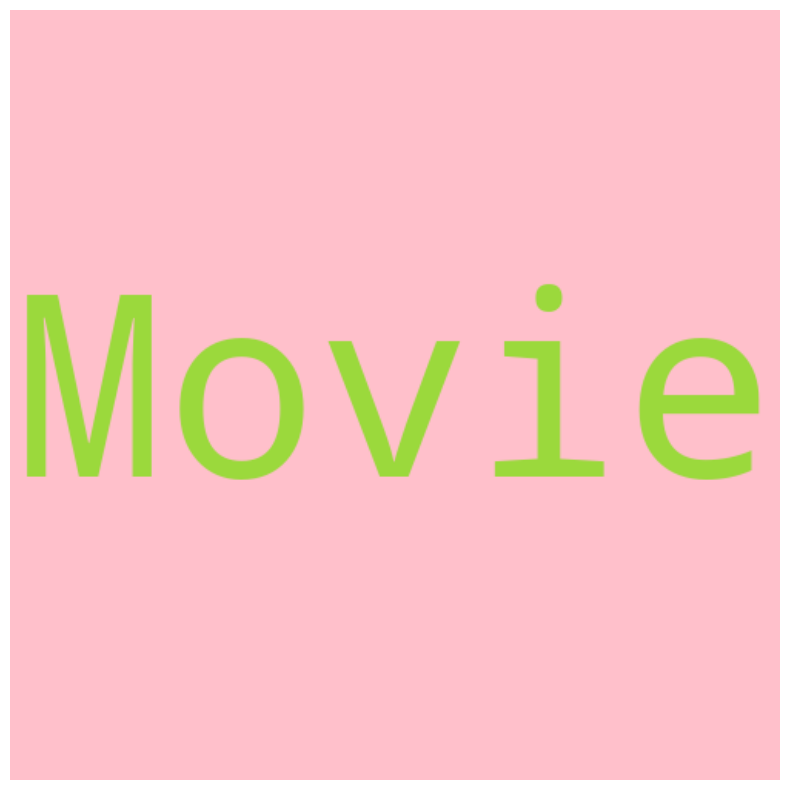

Looking for insights from title Movies/TV Shows


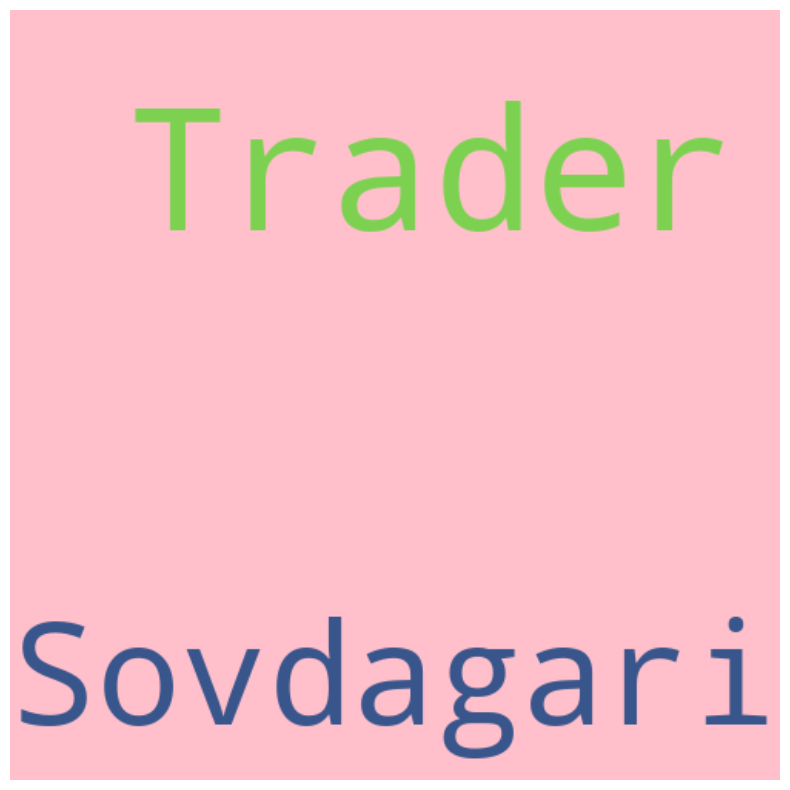

Looking for insights from country Movies/TV Shows


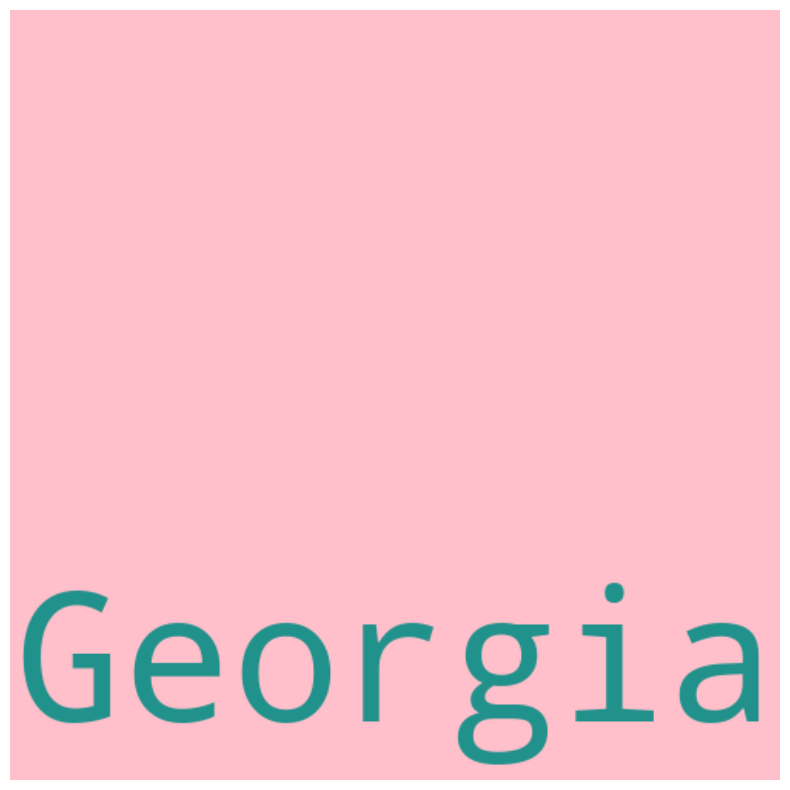

Looking for insights from rating Movies/TV Shows


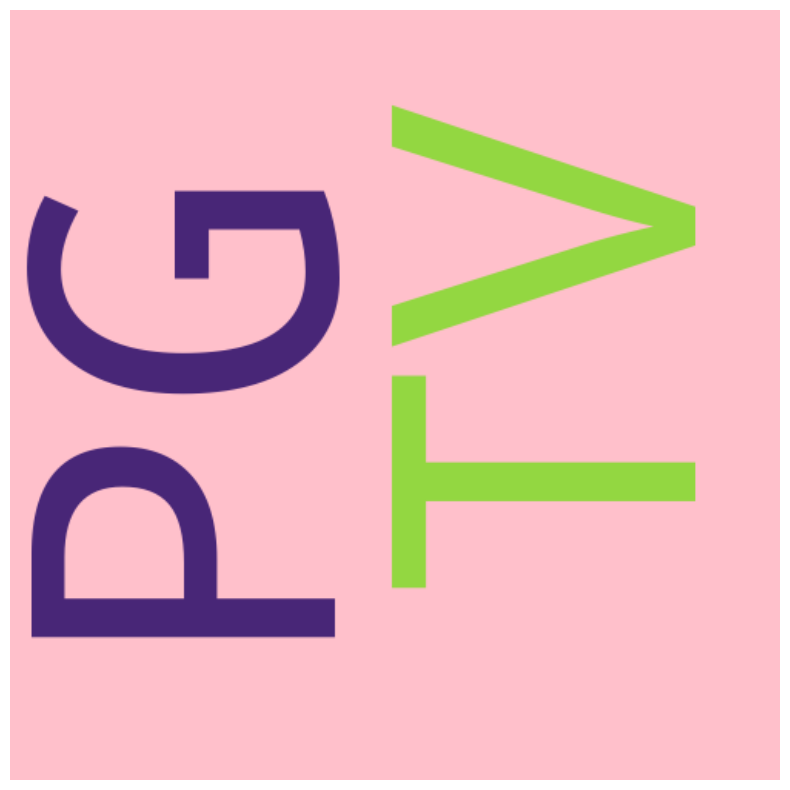

Looking for insights from listed_in Movies/TV Shows


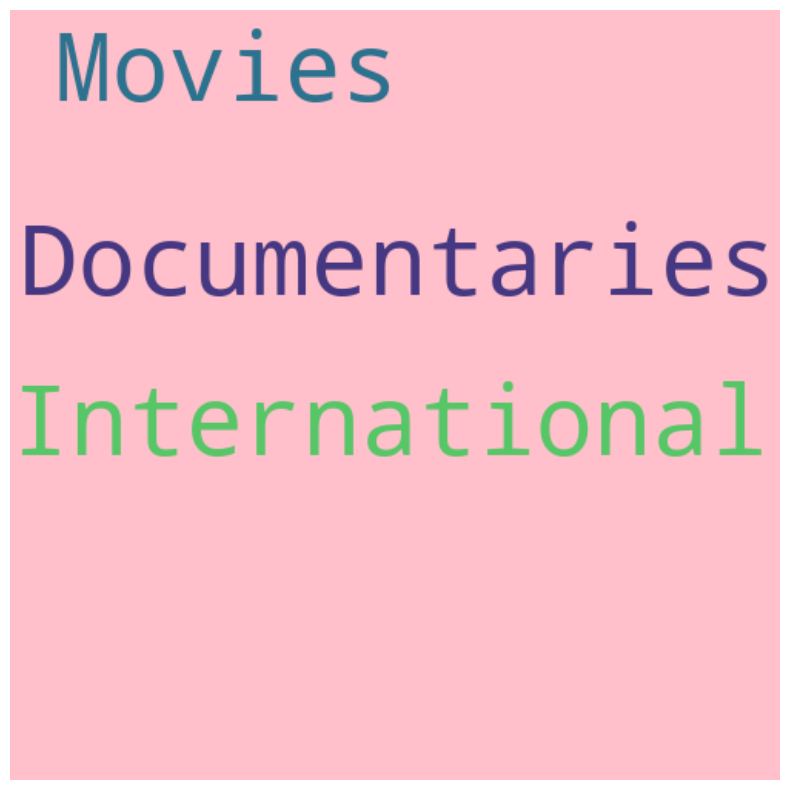

Looking for insights from description Movies/TV Shows


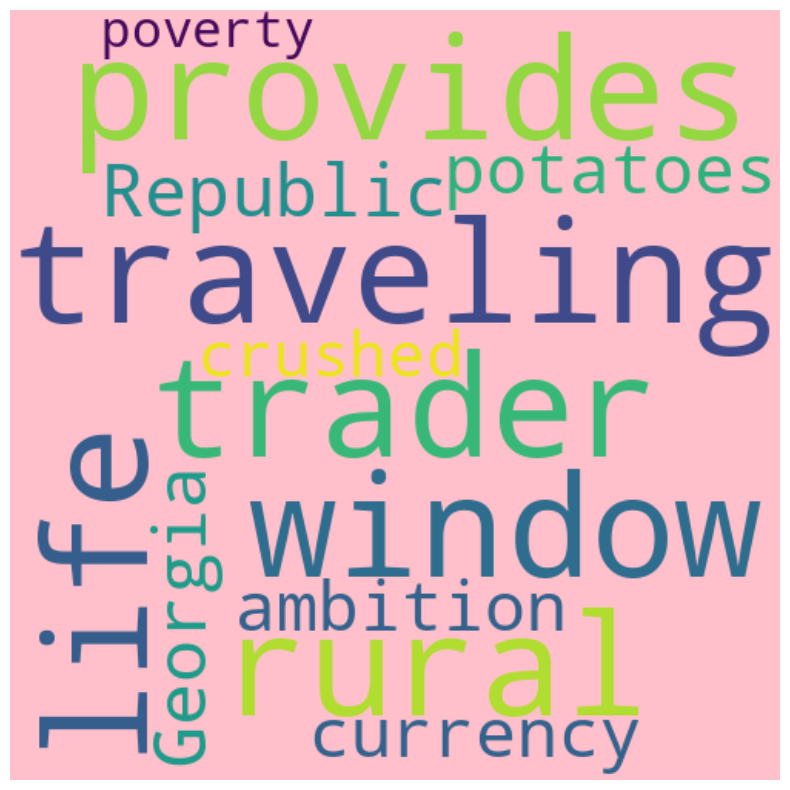

In [ ]:
word_count(11)

Cluster 11 in a dataset contains a total of 410 words. The most frequently occurring words in this cluster are as follows:

**Type** -  Movie & Tv shows

**Title** - Special, America,Time,Live,Comedy, Netflix Alive,
  Martin

**Country** - United States,Brazil,Mexico,Italy

**Rating** -TV-MA,TV-PG

**Listed_in** - Tv-Comedies, Comedy Stand, Talk shows
            

**Description**- Stand Comedy, Comic, Take, Life, Live, Share,Stories.

# 7- **Recommender system**



A **recommender system is a type of information filtering system that suggests items to users based on their preferences**, interests, or past behavior. **It is commonly used in various applications such as e-commerce websites, streaming platforms, social media, and more.** The goal of a recommender system is to provide personalized recommendations that are relevant and helpful to the individual user.





**Content-based filtering:** This approach recommends items similar to the ones a user has liked or interacted with in the past. It analyzes the content or attributes of items and finds similar items to recommend. For example, if a user enjoys watching action movies, the system may recommend other action movies based on genre, actors, or plot.








































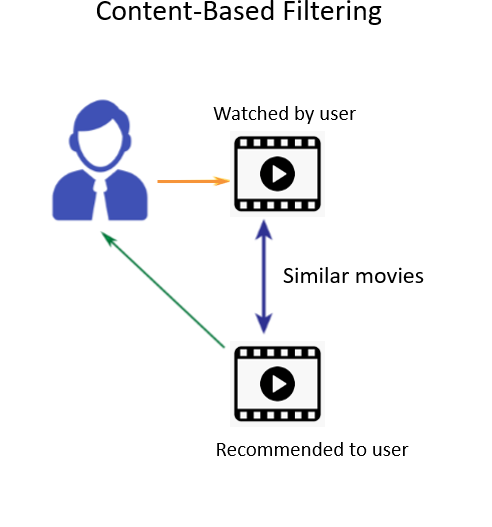

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_movies1['description'] = netflix_movies1['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_movies1['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [ ]:
cosine_sim

array([[1.        , 0.        , 0.05827946, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.09600035, 0.        ,
        0.        ],
       [0.05827946, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09600035, 0.        , ..., 1.        , 0.        ,
        0.02819239],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02819239, 0.        ,
        1.        ]])

In [ ]:
indices = pd.Series(netflix_movies1.index, index=netflix_movies1['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_movies1['title'].iloc[movie_indices]



In [ ]:
netflix_movies1['title'][1:70]

1                                                  7:19
2                                                 23:59
3                                                     9
4                                                    21
5                                                    46
                            ...                        
65                                              13 Sins
66                                                 13TH
67    13TH: A Conversation with Oprah Winfrey & Ava ...
68                                            14 Blades
69                                           14 Cameras
Name: title, Length: 69, dtype: object

In [ ]:
get_recommendations( '14 Cameras',cosine_sim)

5064                           Ragini MMS
5425                  Scandal in Sorrento
2383                               Get In
541                                  Anon
7568                       What We Wanted
2087    Fabulous Lives of Bollywood Wives
7095                           Time Share
6975                         The Vanished
1092                             Breakout
5465                Secreto bien guardado
Name: title, dtype: object

#**8- Conclusion**

**1-** It is interesting to note that the majority of the content available on Netflix consists of movies. However, in recent years, the platform has been focusing more on TV shows.

**2-** Most of these shows are released either at the end or the beginning of the year.

**3-** The United States and India are among the top five countries that produce all of the available content on the platform. Additionally, out of the top ten actors with the maximum content, six of them are from India.

**4-** When it comes to content ratings, TV-MA tops the charts,
 indicating that mature content is more popular on Netflix.

**5-** The value of k=15 was found to be optimal for clustering the data, and it was used to group the content into ten distinct clusters.

**6-** Using this data, a Content based recommender system was created using cosine similarity, which provided recommendations for Movies and TV shows.

# **9. Future Work**

- Integrating this dataset with external sources such as IMDB ratings,books clsutering ,Plant based Type clustering  can lead to numerous intriguing discoveries.

- By incorporating additional data, a more comprehensive recommender system could be developed, offering enhanced recommendations to users. This system could then be deployed on the web for widespread usage.

# ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***